# Implementing Clustering Algorithms:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Cardiotocographic.csv')
df

LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  
0      0.5  43.000000   2.4   64.0  0.999926  2.000000  
1      2.1   0.000000  10.4  130.0  0.000000  1.000000  
2      2.1   0.000000  13.4  130.0  0.000000  1.000000  
3      2.4   0.000000  23.0  117.0  1.000000  1.000000  
4      2.4   0.000000  19.9  117.0  1.000000  1.000000  
...    ...        ...   ...    ...       ...       ...  
2121   0.2  25.000000   7.2   40.0  0.000000  2.000000  
2122   0.4  22.000000   7.1   66.0  1.000000  2.000000  
2123   0.4  20.000000   6.1   67.0  1.000000  1.990464  
2124   0.4  27.000000   7.0   66.0  1.000000  2.000000  
2125   0.4  35.857183   5.0   42.0  0.000000  1.000000  

[2126 rows x 14 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


# Statistical Summary:

In [4]:
df.describe()

LB           AC           FM           UC           DL  \
count  2105.000000  2106.000000  2126.000000  2126.000000  2126.000000   
mean    133.343598     0.003219     0.009894     0.004391     0.001895   
std      11.270154     0.004391     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001634     0.000000     0.004484     0.000000   
75%     140.000000     0.005650     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2105.000000  2105.000000  2126.000000  2126.000000  2126.000000   
mean      0.000003     0.000175    46.995984     1.364378    10.285964   
std       0.000142     0.000840    18.813973     1.173632    21.205041   
min      -0.001353    -0.005348   -63.000000    -6.600000   -91.000000   
25%       0.000000     0.000000    32.000000     0.700000     0.000000   
50%       0.000000     0.000000    49.000000     1.200000     0.000000   
75%       0.000000     0.000000    61.000000     1.700000    11.000000   
max       0.002706     0.010695   162.000000    13.800000   182.000000   

              MLTV        Width     Tendency          NSP  
count  2105.000000  2105.000000  2105.000000  2105.000000  
mean      8.284887    70.429260     0.316371     1.304507  
std       7.772858    42.931822     0.645622     0.644619  
min     -50.700000  -174.000000    -3.000000    -1.025988  
25%       4.600000    37.000000     0.000000     1.000000  
50%       7.400000    67.000000     0.000000     1.000000  
75%      10.900000   100.000000     1.000000     1.000000  
max     101.400000   357.000000     3.000000     5.000000

In [5]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2121    False
2122    False
2123    False
2124    False
2125    False
Length: 2126, dtype: bool

<Axes: >

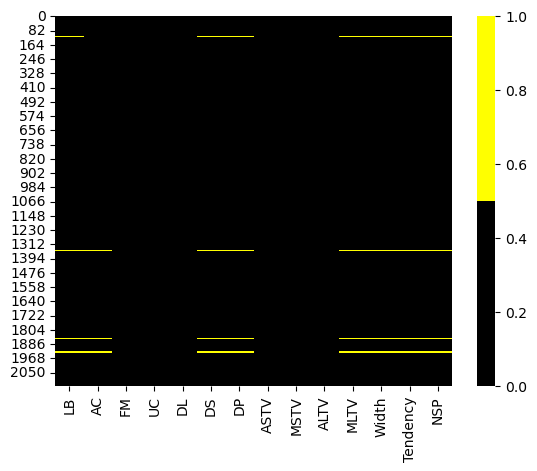

In [6]:
cols = df.columns 
colours = ['black', 'yellow'] # specify the colours - yellow is missing. black is not missing.
sns.heatmap(df[cols].isnull(),
            cmap=sns.color_palette(colours), cbar = True)

In [7]:
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [8]:
median=df['LB'].median()
median

133.0

In [9]:
df['LB']=df['LB'].fillna(median)

In [10]:
df['AC']=df['AC'].fillna(median)

In [11]:
df['DS']=df['DS'].fillna(median)

In [12]:
df['DP']=df['DP'].fillna(median)

In [13]:
df['MLTV']=df['MLTV'].fillna(median)

In [14]:
df['Width']=df['Width'].fillna(median)

In [15]:
df['Tendency']=df['Tendency'].fillna(median)

In [16]:
df['NSP']=df['NSP'].fillna(median)

In [17]:
df

LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  
0      0.5  43.000000   2.4   64.0  0.999926  2.000000  
1      2.1   0.000000  10.4  130.0  0.000000  1.000000  
2      2.1   0.000000  13.4  130.0  0.000000  1.000000  
3      2.4   0.000000  23.0  117.0  1.000000  1.000000  
4      2.4   0.000000  19.9  117.0  1.000000  1.000000  
...    ...        ...   ...    ...       ...       ...  
2121   0.2  25.000000   7.2   40.0  0.000000  2.000000  
2122   0.4  22.000000   7.1   66.0  1.000000  2.000000  
2123   0.4  20.000000   6.1   67.0  1.000000  1.990464  
2124   0.4  27.000000   7.0   66.0  1.000000  2.000000  
2125   0.4  35.857183   5.0   42.0  0.000000  1.000000  

[2126 rows x 14 columns]

In [18]:
df["DS"].value_counts()

 0.000000e+00    1985
 1.330000e+02      21
-1.353180e-03       7
 2.706360e-03       2
 1.078749e-03       1
                 ... 
-2.900000e-06       1
 4.565852e-06       1
 1.354294e-08       1
-2.510000e-06       1
 9.488398e-07       1
Name: DS, Length: 115, dtype: int64

# INTER QUARTILE RANGE

In [19]:
Q1=df['LB'].quantile(0.25)
Q3=df['LB'].quantile(0.75)
IQR=Q3-Q1
print(IQR)

14.0


In [20]:
Q1=df['AC'].quantile(0.25)
Q3=df['AC'].quantile(0.75)
IQR=Q3-Q1
print(IQR)

0.005838198


In [21]:
Q1=df['FM'].quantile(0.25)
Q3=df['FM'].quantile(0.75)
IQR=Q3-Q1
print(IQR)

0.00256657125


In [22]:
Q1=df['UC'].quantile(0.25)
Q3=df['UC'].quantile(0.75)
IQR=Q3-Q1
print(IQR)

0.004685357249999999


In [23]:
Q1=df['DL'].quantile(0.25)
Q3=df['DL'].quantile(0.75)
IQR=Q3-Q1
print(IQR)

0.003289474


In [24]:
Q1=df['DS'].quantile(0.25)
Q3=df['DS'].quantile(0.75)
IQR=Q3-Q1
print(IQR)

0.0


In [25]:
Q1=df['DP'].quantile(0.25)
Q3=df['DP'].quantile(0.75)
IQR=Q3-Q1
print(IQR)

0.0


In [26]:
Q1=df['ASTV'].quantile(0.25)
Q3=df['ASTV'].quantile(0.75)
IQR=Q3-Q1
print(IQR)

29.0


In [27]:
Q1=df['MSTV'].quantile(0.25)
Q3=df['MSTV'].quantile(0.75)
IQR=Q3-Q1
print(IQR)

1.0


In [28]:
Q1=df['ALTV'].quantile(0.25)
Q3=df['ALTV'].quantile(0.75)
IQR=Q3-Q1
print(IQR)

11.0


In [29]:
Q1=df['MLTV'].quantile(0.25)
Q3=df['MLTV'].quantile(0.75)
IQR=Q3-Q1
print(IQR)

6.4


In [30]:
Q1=df['Width'].quantile(0.25)
Q3=df['Width'].quantile(0.75)
IQR=Q3-Q1
print(IQR)

64.0


In [31]:
Q1=df['Tendency'].quantile(0.25)
Q3=df['Tendency'].quantile(0.75)
IQR=Q3-Q1
print(IQR)

1.0


In [32]:
Q1=df['NSP'].quantile(0.25)
Q3=df['NSP'].quantile(0.75)
IQR=Q3-Q1
print(IQR)

0.0


# outliers detection


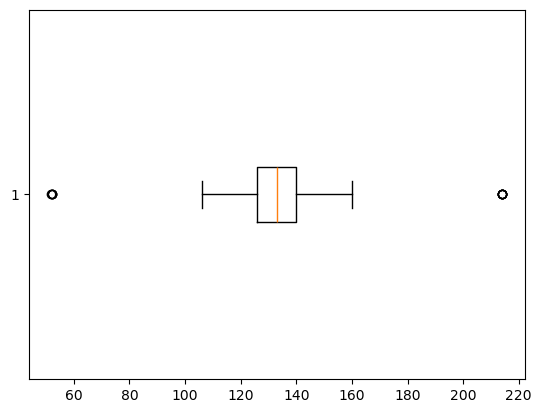

In [33]:
box1=plt.boxplot(df["LB"],vert=False)

In [37]:
#Outliers extraction
[item.get_xdata() for item in box1['fliers']] 

[array([ 52.        ,  52.        ,  51.84248683,  52.1885468 ,
        214.        , 214.        , 214.        , 214.        ,
        214.        , 214.        ])]

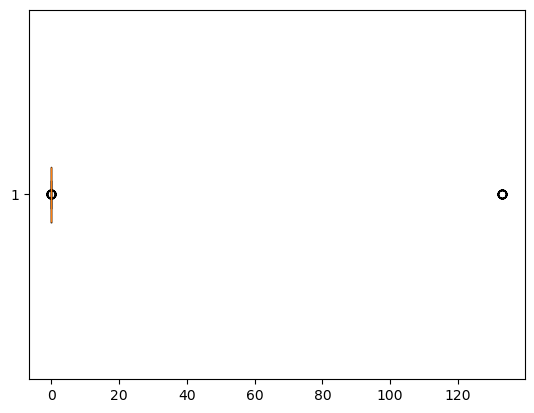

In [38]:
box2=plt.boxplot(df["AC"],vert=False)

In [39]:
[item.get_xdata() for item in box2['fliers']] 

[array([-1.9283747e-02, -1.9283747e-02, -1.9283747e-02, -1.9283747e-02,
         3.8567494e-02,  1.3300000e+02,  1.4705882e-02,  3.8567494e-02,
         1.3300000e+02,  1.7241379e-02,  1.3300000e+02,  1.5552100e-02,
         1.5258216e-02,  1.4725569e-02,  1.5012510e-02,  1.9283747e-02,
         1.5590200e-02,  1.6423358e-02,  1.5781923e-02,  1.3300000e+02,
         1.3300000e+02,  1.3300000e+02,  1.4806378e-02,  3.8567494e-02,
         1.7391304e-02,  1.3300000e+02,  1.3300000e+02,  1.4906832e-02,
         1.3300000e+02,  1.5642458e-02,  1.7667845e-02,  1.7341040e-02,
         1.3300000e+02,  3.8567494e-02,  1.7857143e-02,  1.5113350e-02,
         1.3300000e+02,  1.3300000e+02,  1.3300000e+02,  1.3300000e+02,
         1.3300000e+02,  1.3300000e+02,  1.3300000e+02,  1.5906681e-02,
         1.7073171e-02,  1.5165877e-02,  1.6000000e-02,  1.3300000e+02,
         1.4842301e-02,  3.8567494e-02,  1.3300000e+02,  1.3300000e+02,
         3.8567494e-02])]

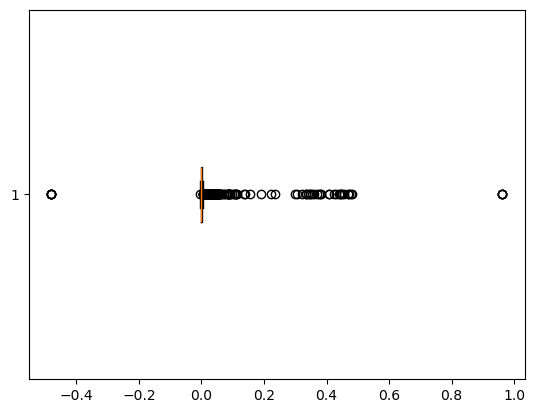

In [41]:
box3=plt.boxplot(df["FM"],vert=False)

In [42]:
[item.get_xdata() for item in box3['fliers']] 

[array([-0.4806338 , -0.4806338 , -0.4806338 , -0.4806338 , -0.4806338 ,
        -0.4806338 , -0.00510554,  0.07233502,  0.22239032,  0.40783987,
         0.38022284,  0.4414003 ,  0.38262195,  0.45092461,  0.46925021,
         0.34004474,  0.425     ,  0.33512066,  0.13511259,  0.0987842 ,
         0.10758966,  0.11189802,  0.08864266,  0.10258549,  0.08497724,
         0.10909091,  0.07923269,  0.06491885,  0.05465587,  0.05754796,
         0.04704097,  0.03793627,  0.01158301,  0.01799486,  0.02014389,
         0.00891266,  0.00977199,  0.00766871,  0.00721154,  0.00840336,
         0.02991692,  0.02587322,  0.1070615 ,  0.00911162,  0.00653595,
         0.00834028,  0.01251956,  0.01582278,  0.02919099,  0.04979253,
         0.0531401 ,  0.05752961,  0.00865801,  0.01098901,  0.00750625,
         0.00703235,  0.00724638,  0.01334445,  0.01270417,  0.01639344,
         0.00770713,  0.01481482,  0.00755667,  0.01026694,  0.02228412,
         0.02631579,  0.01515152,  0.00696864,  0.0

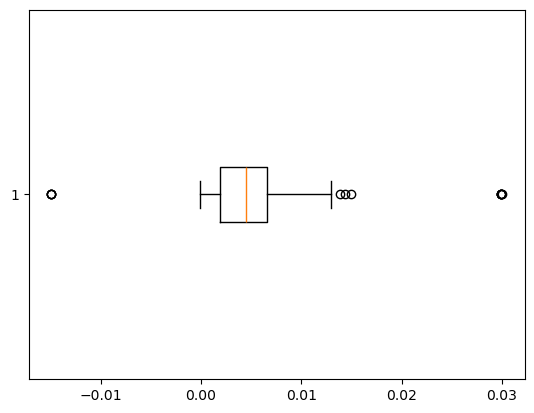

In [43]:
box4=plt.boxplot(df["UC"],vert=False)

In [44]:
[item.get_xdata() for item in box4['fliers']] 

[array([-0.01492537, -0.01492537, -0.01492537, -0.01492537,  0.02985075,
         0.02985075,  0.02985075,  0.01492537,  0.02993591,  0.02985075,
         0.03000183,  0.01386139,  0.01437372])]

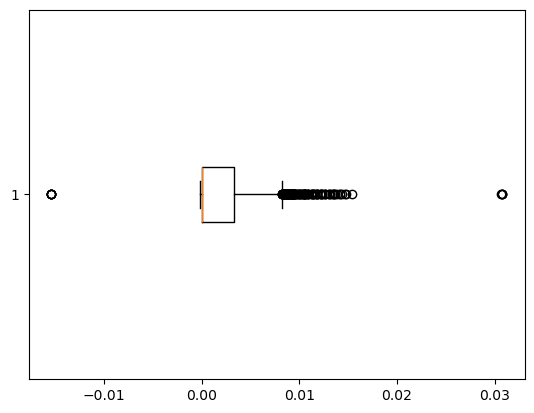

In [45]:
box5=plt.boxplot(df["DL"],vert=False)

In [46]:
[item.get_xdata() for item in box5['fliers']] 

[array([-0.01538462, -0.01538462, -0.01538462, -0.01539347, -0.01538462,
        -0.01538462,  0.00944386,  0.00841515,  0.00834028,  0.01215805,
         0.01000834,  0.01416431,  0.00963698,  0.00849858,  0.00829875,
         0.01154401,  0.01538462,  0.03076923,  0.03062062,  0.03076923,
         0.01385042,  0.01062802,  0.01362398,  0.01165803,  0.00933489,
         0.01076716,  0.03076923,  0.01      ,  0.00920245,  0.00887574,
         0.00876095,  0.00831601,  0.01089325,  0.01231527,  0.01144165,
         0.00847458,  0.00921659,  0.0106383 ,  0.00824176,  0.00877193,
         0.00944206,  0.01144984,  0.01415094,  0.01474202,  0.00824742,
         0.0105042 ,  0.01259446,  0.0089251 ,  0.00862952,  0.00917431,
         0.00896861,  0.00847458,  0.0087146 ,  0.00843882,  0.01224847,
         0.01237345,  0.01263158,  0.01119403,  0.01352657,  0.00853242,
         0.00829016,  0.00926843,  0.01034929,  0.00935829,  0.01227679,
         0.01306413,  0.01179941,  0.01057579,  0.0

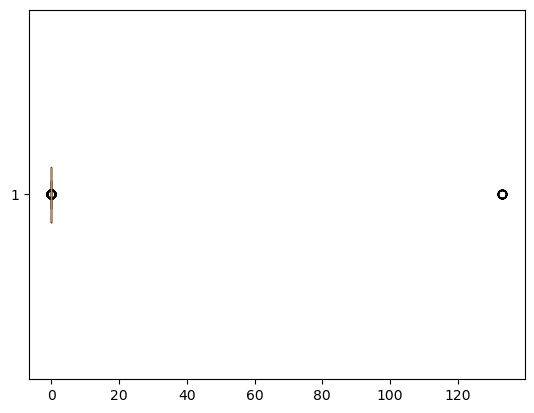

In [48]:
box6=plt.boxplot(df["DS"],vert=False)

In [49]:
[item.get_xdata() for item in box6['fliers']] 

[array([-1.79000000e-06, -3.24000000e-06, -2.26000000e-06, -2.22000000e-06,
        -3.09000000e-06, -2.52000000e-06, -3.27000000e-06, -1.09000000e-06,
        -5.37000000e-06, -1.70000000e-06, -4.21000000e-06, -8.96000000e-08,
        -3.98000000e-07, -4.76000000e-07, -2.61000000e-07, -2.51000000e-06,
        -2.90000000e-06, -2.50000000e-06, -2.05000000e-06, -1.35318000e-03,
        -5.05000000e-06, -1.22000000e-07, -3.45000000e-07, -7.38000000e-07,
        -8.13000000e-07, -6.65000000e-06, -8.23000000e-07, -8.07000000e-07,
        -1.23000000e-06, -1.35318000e-03, -1.35318000e-03, -4.01000000e-06,
        -2.59000000e-06, -6.52000000e-06, -2.47000000e-06, -1.35318000e-03,
        -1.47000000e-06, -4.74000000e-07, -2.01000000e-06, -3.74000000e-07,
        -1.35318000e-03, -1.55000000e-06, -3.84000000e-06, -1.35318000e-03,
        -8.51000000e-10, -1.55000000e-09, -6.05000000e-08, -3.62000000e-07,
        -1.07000000e-06, -4.11000000e-06, -1.35318000e-03, -2.12000000e-06,
        -8.7

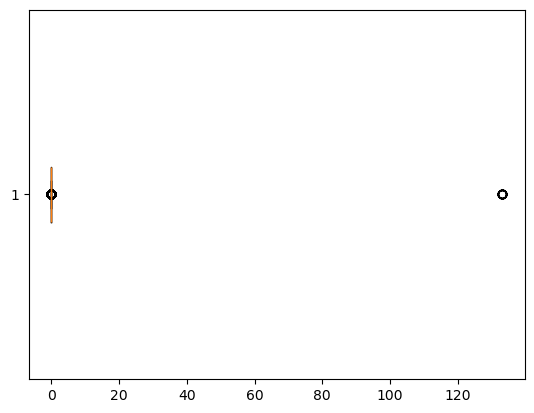

In [50]:
box7=plt.boxplot(df["DP"],vert=False)

In [51]:
[item.get_xdata() for item in box7['fliers']] 

[array([-1.35000000e-05, -5.34759400e-03, -5.69000000e-06, -6.21000000e-06,
        -5.34759400e-03, -2.97000000e-05, -2.74000000e-06, -2.19000000e-05,
        -2.56000000e-06, -1.03000000e-05, -1.63000000e-05, -1.57000000e-05,
        -2.25000000e-05, -3.43000000e-05, -1.02000000e-06, -9.36000000e-06,
        -2.04000000e-05, -1.88000000e-05, -4.38000000e-05, -5.17000000e-06,
        -4.48000000e-05, -1.36000000e-05, -1.87000000e-05, -1.83000000e-05,
        -2.81000000e-05, -2.75000000e-06, -4.03000000e-06, -2.08000000e-05,
        -1.77000000e-05, -3.52000000e-06, -1.53000000e-06, -3.37000000e-05,
        -6.99000000e-06, -5.34759400e-03, -1.50000000e-05, -2.02000000e-05,
        -1.49000000e-05, -1.70000000e-05, -2.44000000e-05, -8.84000000e-06,
        -1.50000000e-05, -1.26000000e-05, -3.03000000e-06, -7.03000000e-06,
        -5.34759400e-03, -1.79000000e-07, -2.35000000e-05, -2.59000000e-05,
        -1.73000000e-05, -1.82000000e-05, -3.45000000e-06, -2.58000000e-05,
         2.0

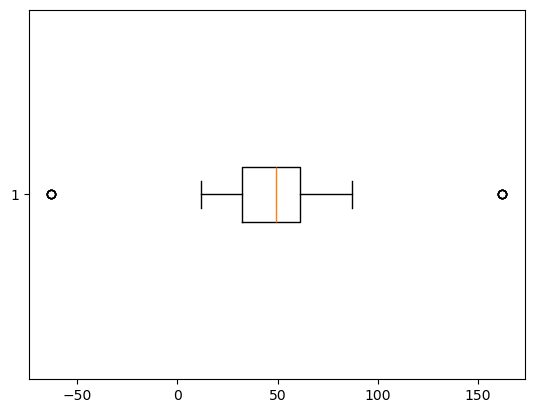

In [52]:
box8=plt.boxplot(df["ASTV"],vert=False)

In [53]:
[item.get_xdata() for item in box8['fliers']] 

[array([-63., -63., -63., -63., -63., 162., 162., 162., 162., 162.])]

{'whiskers': [<matplotlib.lines.Line2D at 0x25320a98190>,
 'caps': [<matplotlib.lines.Line2D at 0x25320a99410>,
 'boxes': [<matplotlib.lines.Line2D at 0x25320a83650>],
 'medians': [<matplotlib.lines.Line2D at 0x25320a9a490>],
 'fliers': [<matplotlib.lines.Line2D at 0x25320a9ac50>],
 'means': []}

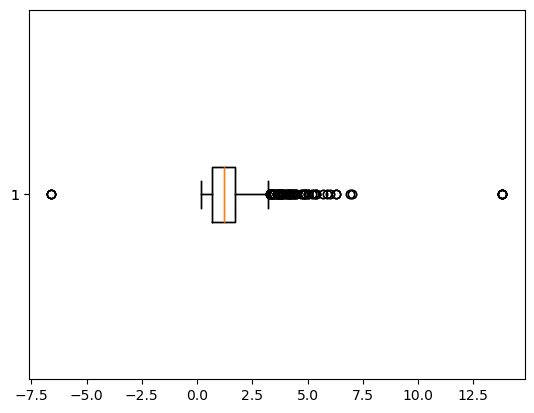

In [54]:
box9 = plt.boxplot(df["MSTV"],vert=False)
plt.boxplot(df["MSTV"],vert=False)

In [55]:
# Extraction of outliers
[item.get_xdata() for item in box9['fliers']] #fliers are outliers

[array([-6.6       , -6.6       , -6.6       ,  5.9       ,  6.3       ,
         4.4       ,  6.        ,  4.5       ,  6.9       ,  3.4       ,
         3.7       ,  3.4       ,  3.6       ,  4.4       ,  4.7       ,
         4.9       ,  5.        ,  7.        ,  4.1       ,  5.4       ,
         3.9       ,  5.2       ,  4.8       ,  4.3       ,  3.7       ,
         5.3       ,  4.8       ,  3.4       ,  3.3       ,  3.4       ,
         3.4       ,  3.8       , 13.8       ,  3.7       , 13.8       ,
         5.7       ,  4.9       ,  5.        ,  4.        ,  5.4       ,
         3.5       ,  3.4       ,  3.4       ,  3.8       ,  3.78426342,
         4.1       ,  4.9       ,  6.3       ,  4.5       ,  3.6       ,
         3.3       ,  3.4       , 13.8       ,  3.6       , 13.8       ,
         3.5       ,  3.8       ,  3.4       ,  3.4       , 13.8       ,
         3.8       ,  4.2       ,  3.3       ,  3.6       ,  3.40163125,
         3.3       ,  3.5       ,  4.00874906,  3.8

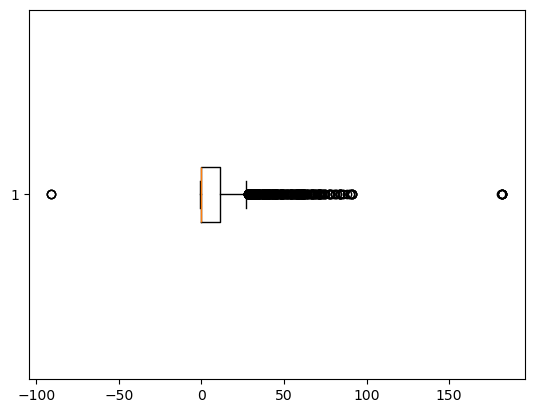

In [58]:
box10=plt.boxplot(df["ALTV"],vert=False)

In [59]:
[item.get_xdata() for item in box10['fliers']] 

[array([-91.        , -91.        , -91.        ,  43.        ,
         79.        ,  72.        ,  71.        ,  40.        ,
         69.        ,  54.        ,  53.        ,  38.        ,
         29.        ,  36.64007017,  29.        ,  67.        ,
         68.        ,  75.        ,  74.        ,  30.        ,
         49.        ,  39.        ,  30.19893853,  32.        ,
        182.        ,  34.        ,  38.        ,  31.        ,
         58.        ,  39.        ,  46.        ,  57.        ,
         75.        ,  28.85072021,  33.        ,  40.        ,
         51.        ,  37.        , 182.        ,  34.40761222,
         34.        ,  54.        ,  58.        ,  52.        ,
         32.        ,  38.        ,  59.        ,  78.        ,
         84.        ,  71.        ,  59.        ,  52.        ,
         62.        ,  39.        ,  45.        ,  30.        ,
         45.        ,  35.        ,  67.        ,  71.54948564,
         45.        ,  58.        ,  32.

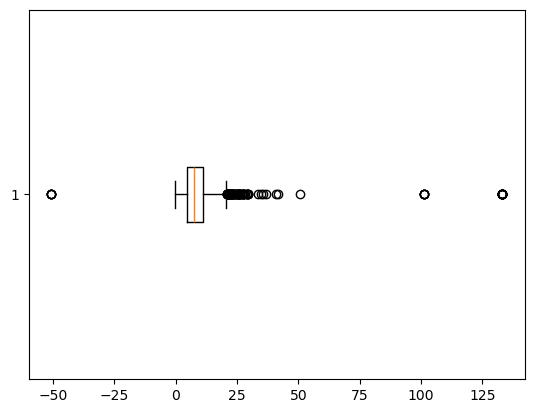

In [60]:
box11=plt.boxplot(df["MLTV"],vert=False)

In [61]:
[item.get_xdata() for item in box11['fliers']] 

[array([-50.7       , -50.7       , -50.7       , -50.7       ,
        -50.7       ,  23.        ,  27.6       ,  29.5       ,
         21.7       ,  24.2       ,  22.1       ,  21.1       ,
        133.        ,  22.2       ,  22.3       ,  21.3       ,
         25.9       ,  23.4       , 133.        , 133.        ,
         26.3       ,  35.7       ,  41.8       ,  50.7       ,
         25.8       ,  23.3       , 133.        ,  28.4       ,
         21.4       ,  29.6       ,  29.3       ,  22.98483551,
         34.7       ,  21.7       ,  27.3       , 133.        ,
         26.3       , 133.        , 133.        ,  24.7       ,
         21.5       ,  27.3       ,  25.6       ,  26.1       ,
         36.9       ,  27.6       ,  29.        ,  28.        ,
         21.7       ,  23.76736645,  40.8       ,  21.55162378,
         25.8       ,  21.4       ,  21.3       ,  25.2       ,
         21.9       ,  20.8       ,  21.3       ,  22.3       ,
        133.        , 133.        ,  24.

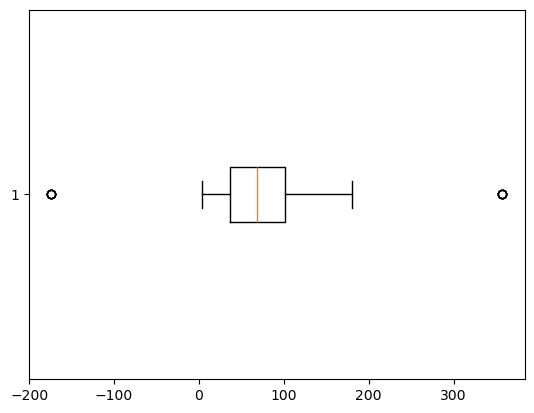

In [62]:
box12=plt.boxplot(df["Width"],vert=False)

In [63]:
[item.get_xdata() for item in box12['fliers']] 

[array([-174., -174., -174., -174., -174.,  357.,  357.,  357.,  357.,
         357.])]

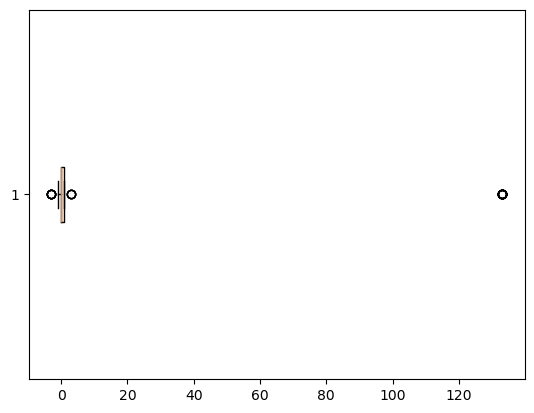

In [65]:
box13=plt.boxplot(df["Tendency"],vert=False)

In [66]:
[item.get_xdata() for item in box13['fliers']] 

[array([ -3.        ,  -3.        ,  -2.99631374,  -3.        ,
         -3.        ,  -3.        , 133.        , 133.        ,
        133.        , 133.        , 133.        , 133.        ,
        133.        , 133.        , 133.        , 133.        ,
          3.        , 133.        , 133.        , 133.        ,
          3.        , 133.        ,   3.        , 133.        ,
        133.        , 133.        , 133.        ,   3.        ,
        133.        , 133.        , 133.        ])]

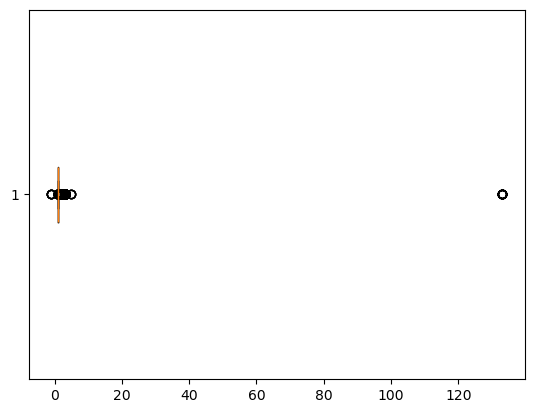

In [67]:
box14=plt.boxplot(df["NSP"],vert=False)

In [68]:
[item.get_xdata() for item in box14['fliers']] 

[array([ -1.025988  ,   0.99671416,   0.99775653,   0.99792058,
          0.99796582,   0.98342028,  -1.        ,  -1.        ,
          0.99418412,   0.97544038,   0.99223419,   0.99768784,
          0.98122639,   0.99120013,   0.98483388,   0.99284679,
          0.99597399,   0.97973798,   0.99167495,   0.98839285,
          0.98749813,   0.99379572,   0.98900567,   0.99634758,
          0.99106613,  -1.        ,   0.98145959,   0.9959162 ,
          0.97230458,   0.9670755 ,   0.98479205,   0.99986549,
         -1.        ,   0.98952542,   0.97817368,   0.96944689,
          0.97927954,   0.99747931,  -1.        ,   0.98925697,
          0.99663093,   0.98839898,   0.99661416,   0.9979391 ,
          0.99443184,   0.99972369,   0.99391695,   0.99829981,
          0.99369481,   0.98986216,   2.        ,   3.        ,
          3.        ,   3.        ,   3.        ,   2.        ,
          2.        ,   2.        ,   3.        ,   3.        ,
          3.        ,   3.        ,   3.

# Data Visualization:

<Axes: xlabel='LB', ylabel='Count'>

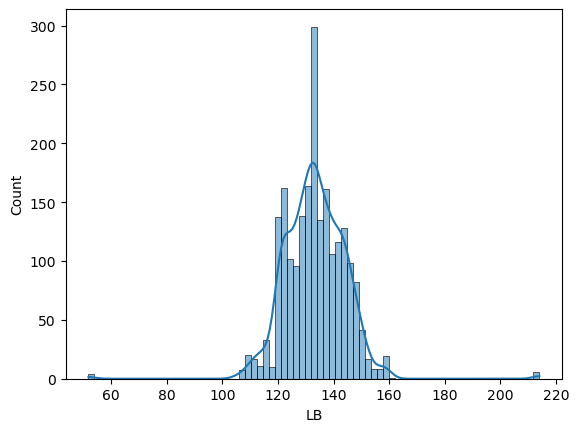

In [69]:
sns.histplot(df["LB"],kde=True)

<Axes: xlabel='AC', ylabel='Count'>

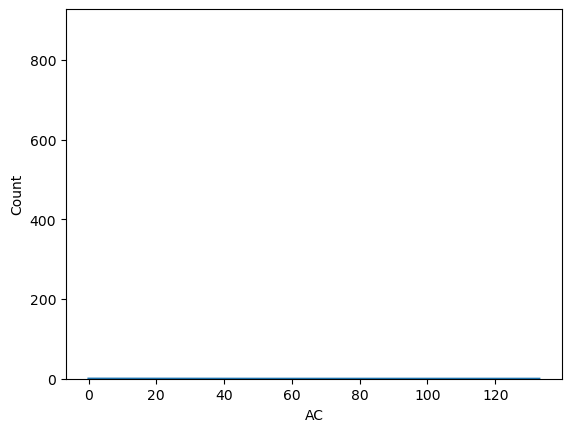

In [72]:
sns.histplot(df["AC"],kde=True)

<Axes: xlabel='FM', ylabel='Count'>

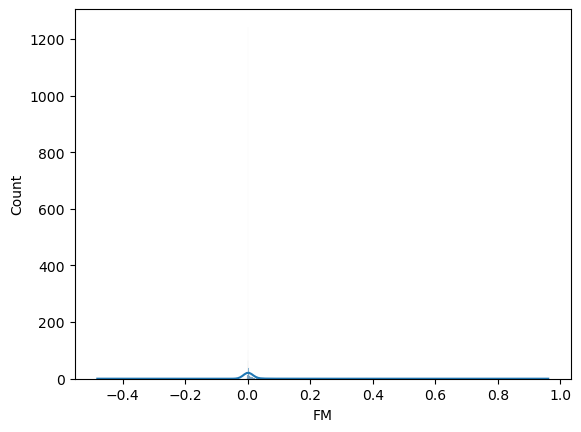

In [73]:
sns.histplot(df["FM"],kde=True)

<Axes: xlabel='UC', ylabel='Count'>

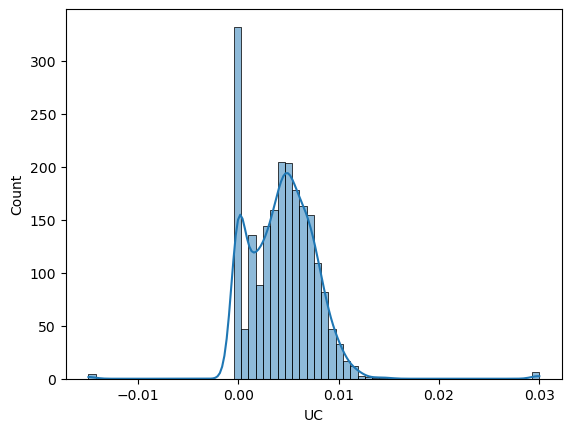

In [74]:
sns.histplot(df["UC"],kde=True)

<Axes: xlabel='DL', ylabel='Count'>

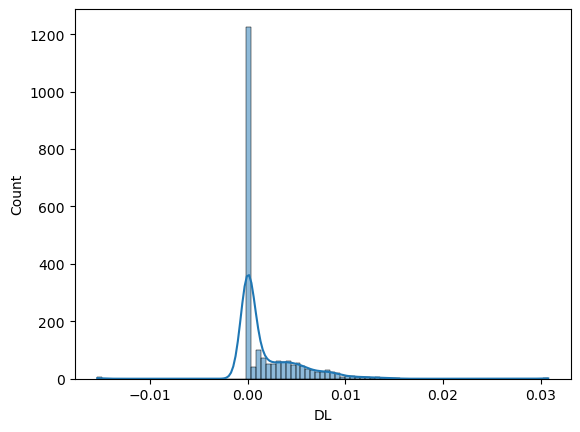

In [75]:
sns.histplot(df["DL"],kde=True)

<Axes: xlabel='DS', ylabel='Count'>

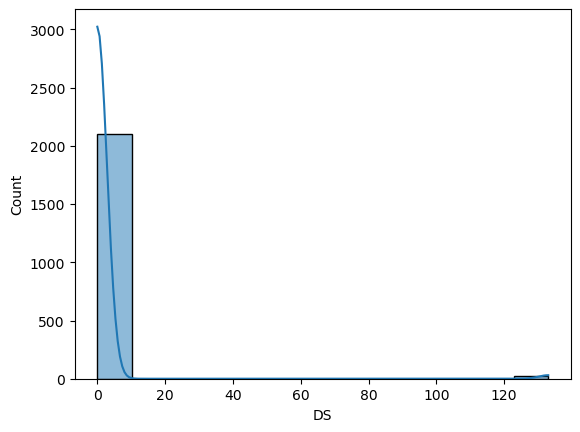

In [76]:
sns.histplot(df["DS"],kde=True)

<Axes: xlabel='DP', ylabel='Count'>

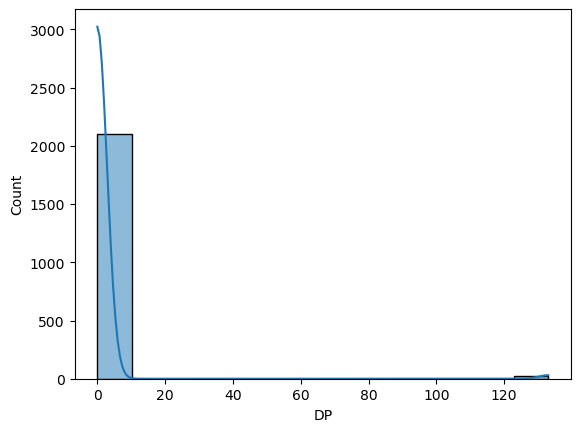

In [77]:
sns.histplot(df["DP"],kde=True)

<Axes: xlabel='ASTV', ylabel='Count'>

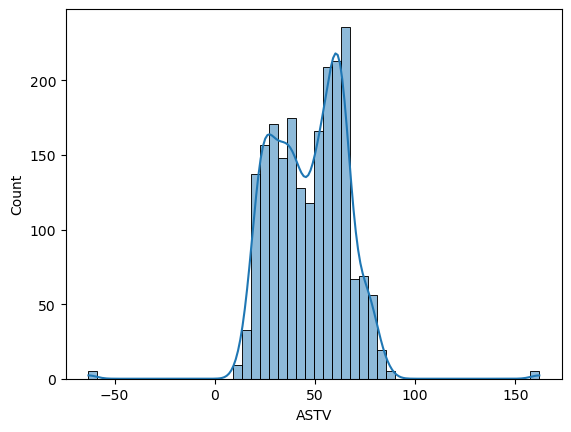

In [78]:
sns.histplot(df["ASTV"],kde=True)

<Axes: xlabel='MSTV', ylabel='Count'>

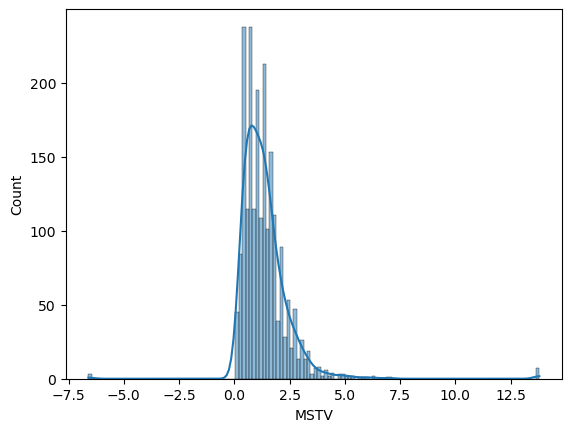

In [79]:
sns.histplot(df["MSTV"],kde=True)

<Axes: xlabel='ALTV', ylabel='Count'>

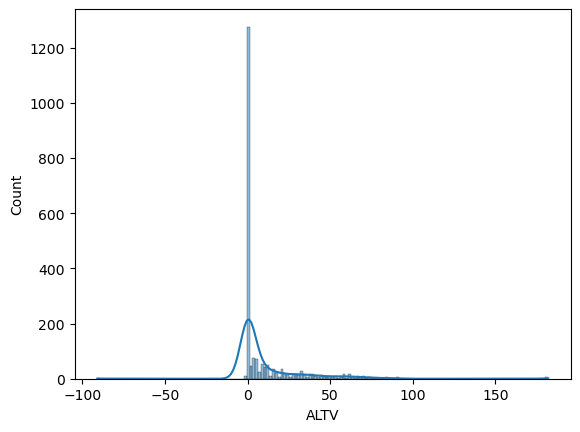

In [80]:
sns.histplot(df["ALTV"],kde=True)

<Axes: xlabel='MLTV', ylabel='Count'>

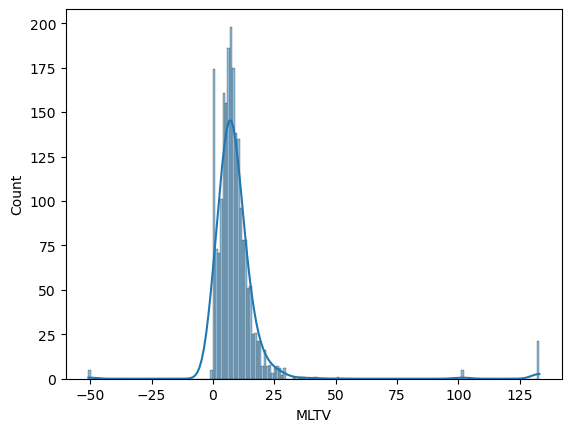

In [81]:
sns.histplot(df["MLTV"],kde=True)

<Axes: xlabel='Width', ylabel='Count'>

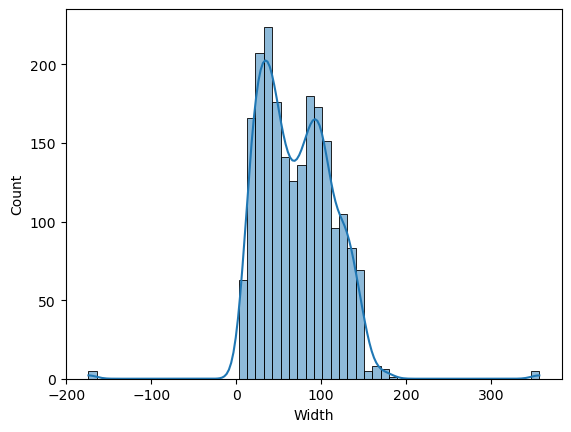

In [82]:
sns.histplot(df["Width"],kde=True)

<Axes: xlabel='Tendency', ylabel='Count'>

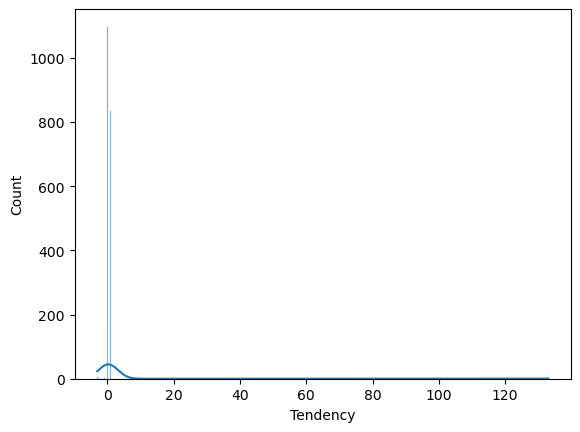

In [83]:
sns.histplot(df["Tendency"],kde=True)

<Axes: xlabel='NSP', ylabel='Count'>

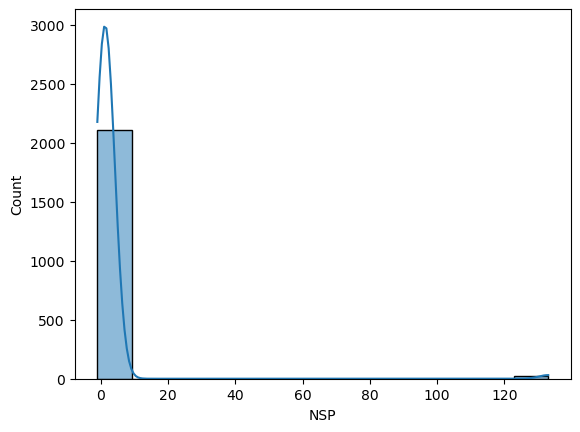

In [84]:
sns.histplot(df["NSP"],kde=True)

In [85]:
categorical_columns = df.select_dtypes(include=['number']).columns
categorical_columns


Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

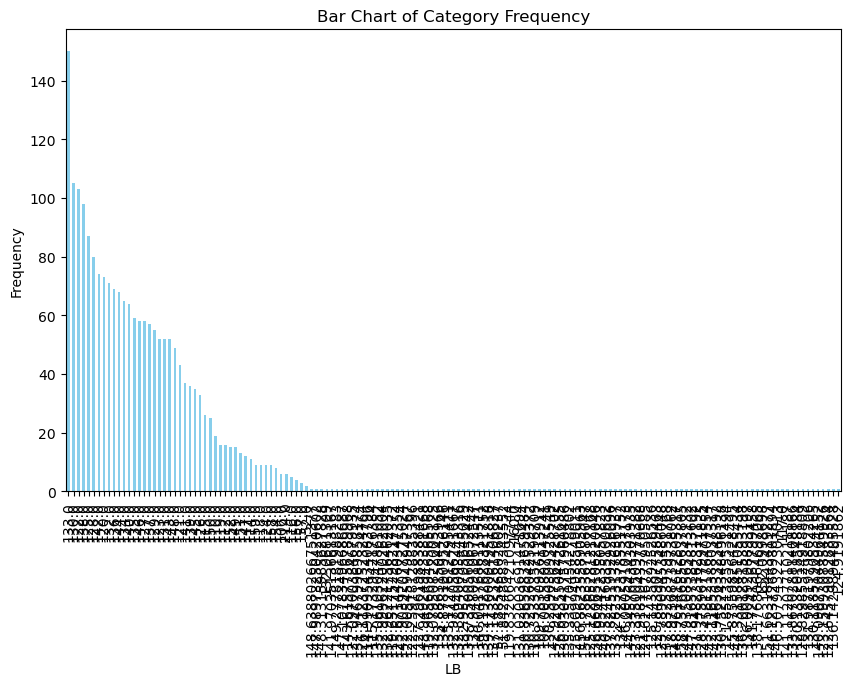

In [86]:
value_counts = df['LB'].value_counts()

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Bar Chart of Category Frequency')
plt.xlabel('LB')
plt.ylabel('Frequency')
plt.show()

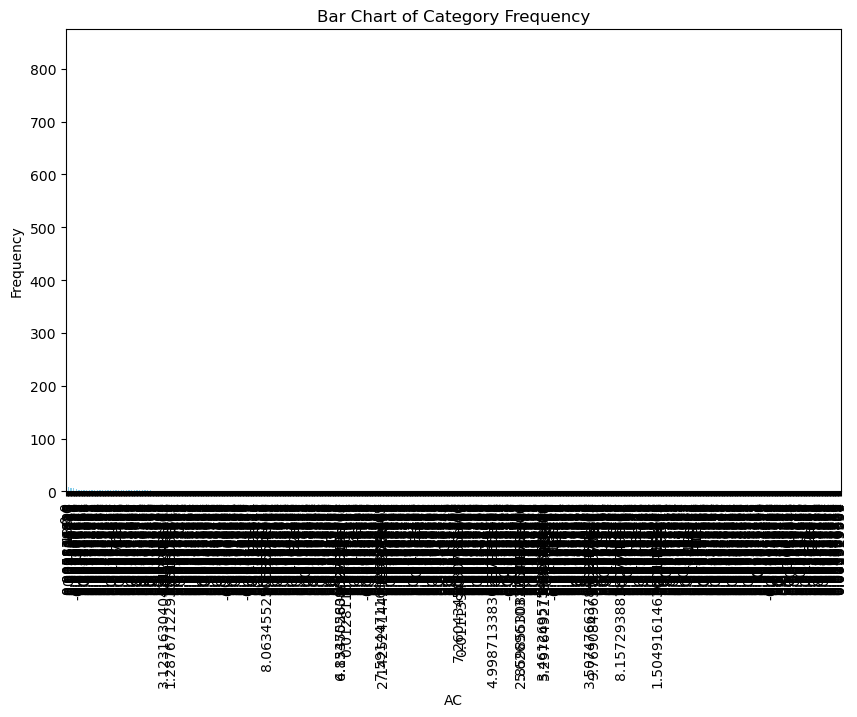

In [87]:
value_counts = df['AC'].value_counts()

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Bar Chart of Category Frequency')
plt.xlabel('AC')
plt.ylabel('Frequency')
plt.show()

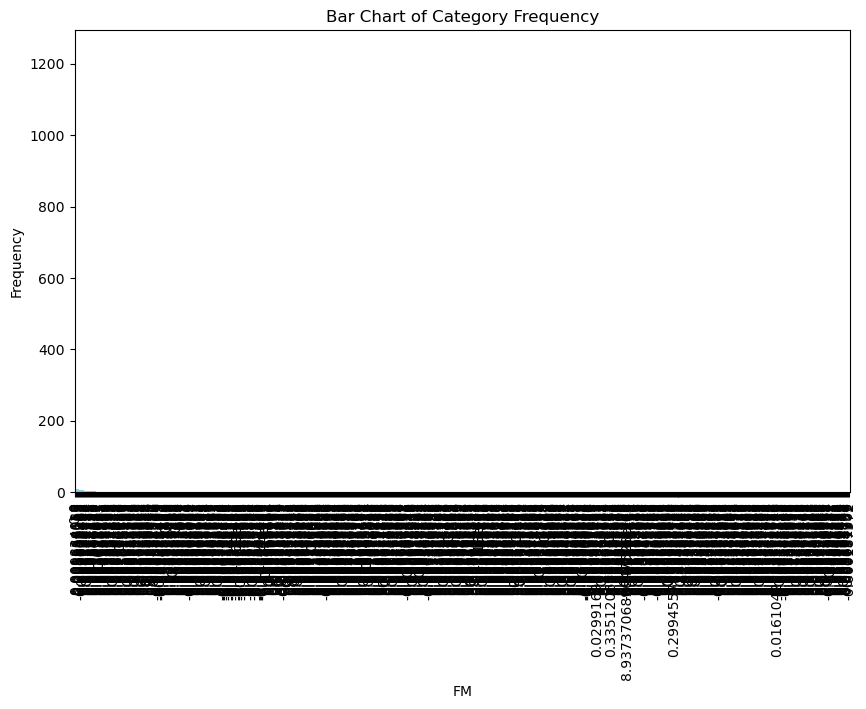

In [88]:
value_counts = df['FM'].value_counts()

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Bar Chart of Category Frequency')
plt.xlabel('FM')
plt.ylabel('Frequency')
plt.show()

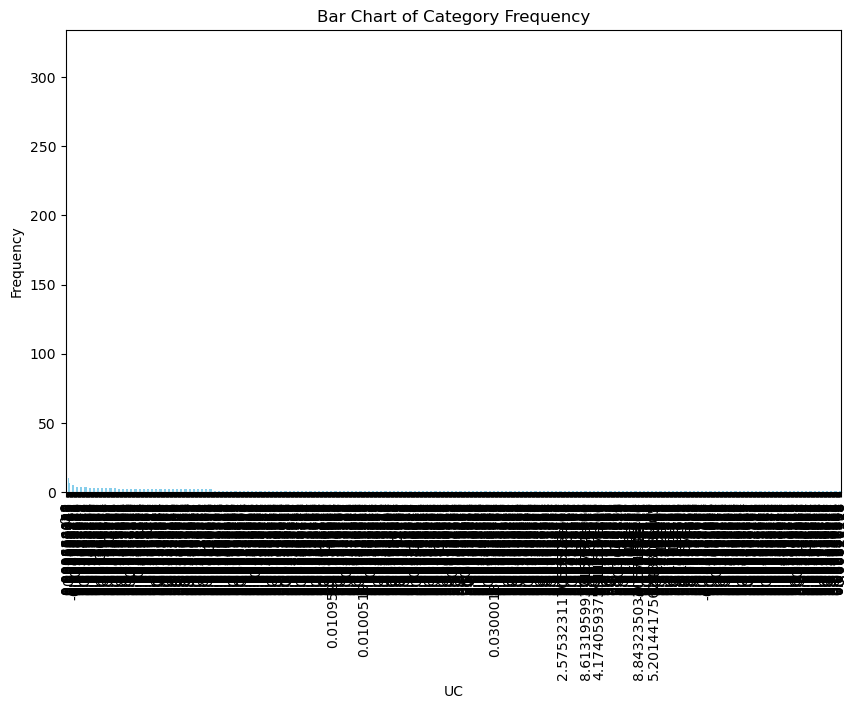

In [89]:
value_counts = df['UC'].value_counts()

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Bar Chart of Category Frequency')
plt.xlabel('UC')
plt.ylabel('Frequency')
plt.show()

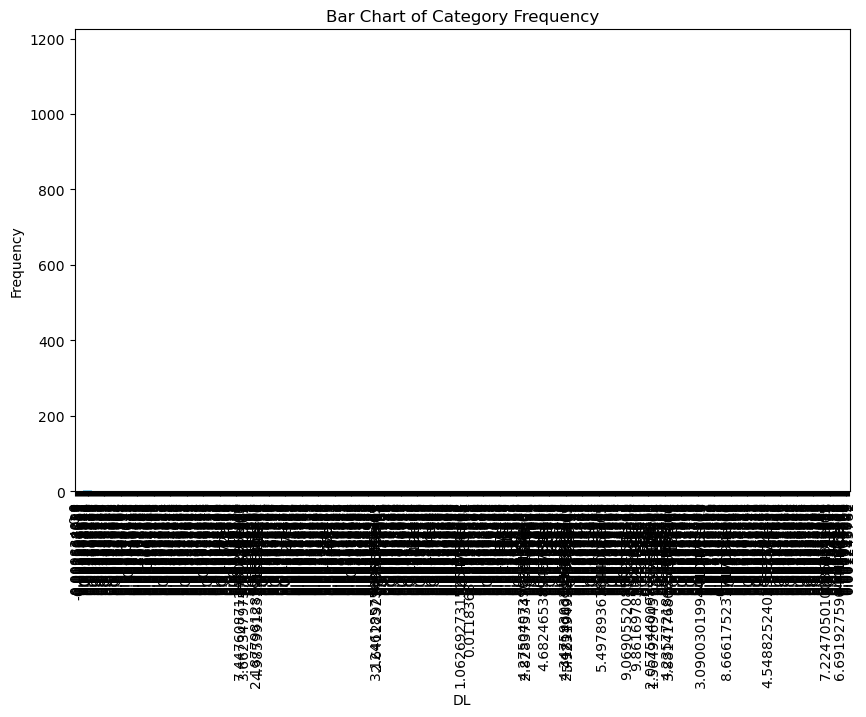

In [90]:
value_counts = df['DL'].value_counts()

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Bar Chart of Category Frequency')
plt.xlabel('DL')
plt.ylabel('Frequency')
plt.show()

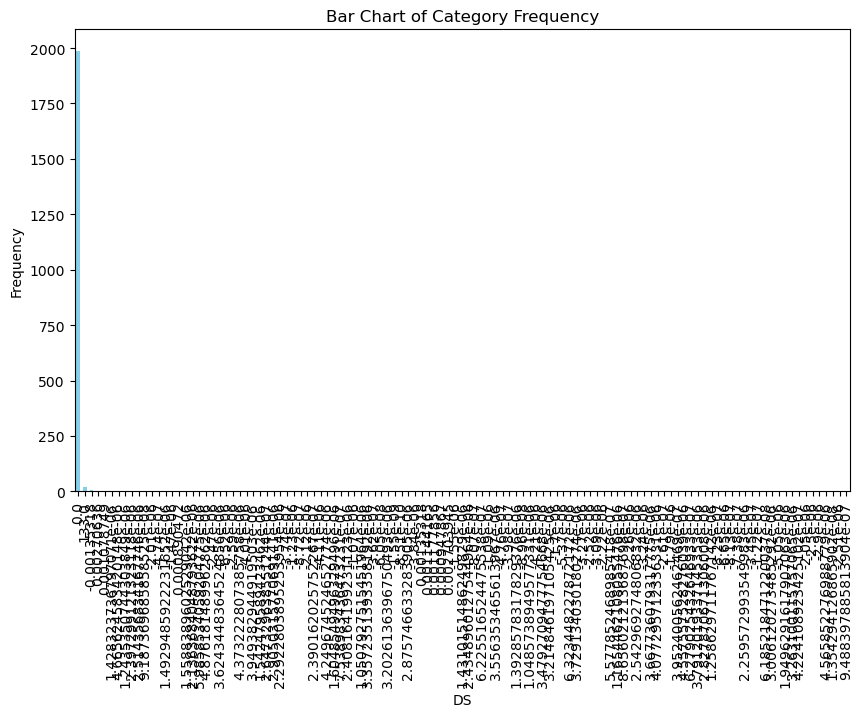

In [91]:
value_counts = df['DS'].value_counts()

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Bar Chart of Category Frequency')
plt.xlabel('DS')
plt.ylabel('Frequency')
plt.show()

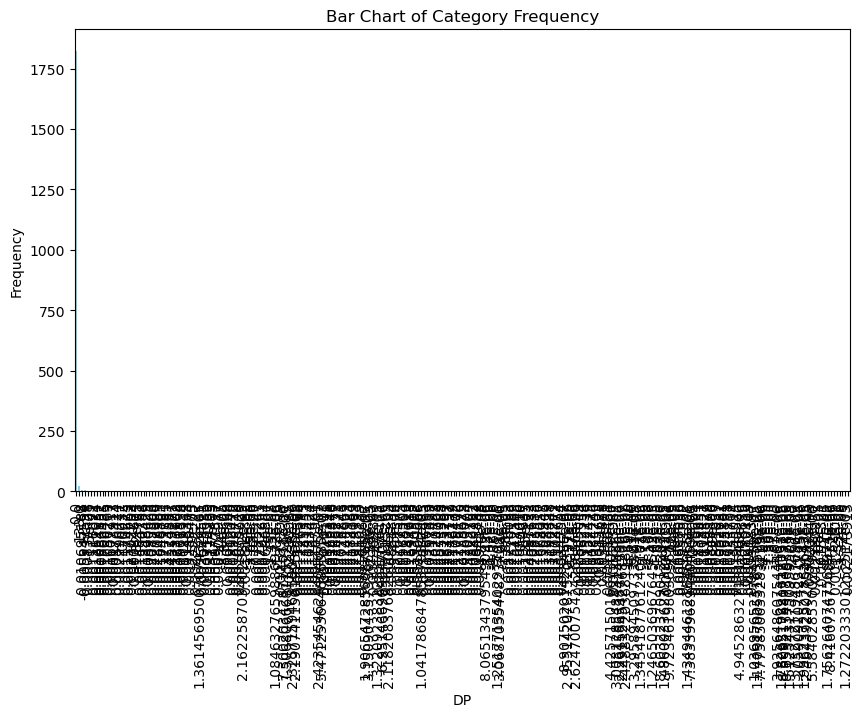

In [92]:
value_counts = df['DP'].value_counts()

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Bar Chart of Category Frequency')
plt.xlabel('DP')
plt.ylabel('Frequency')
plt.show()

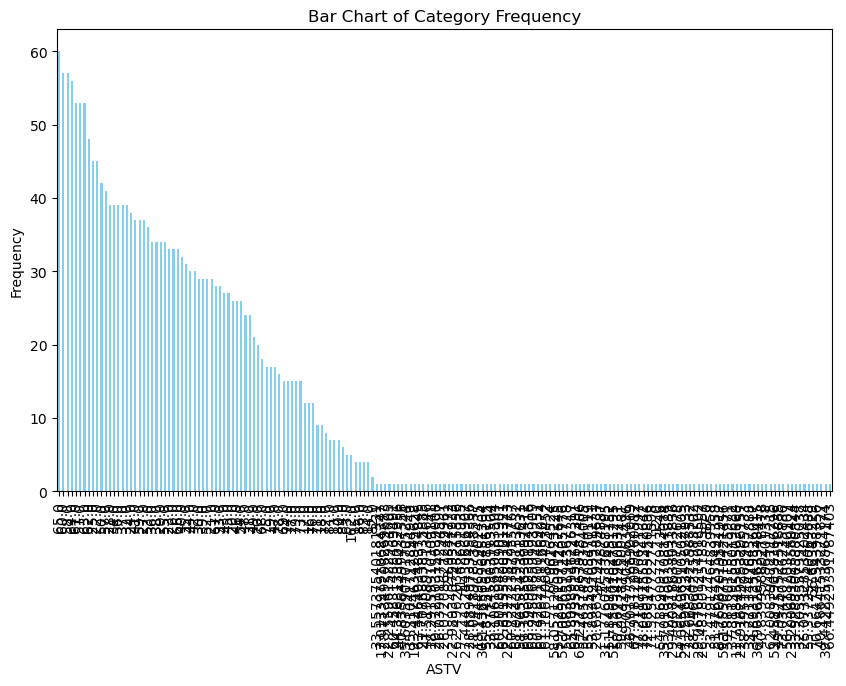

In [93]:
value_counts = df['ASTV'].value_counts()

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Bar Chart of Category Frequency')
plt.xlabel('ASTV')
plt.ylabel('Frequency')
plt.show()

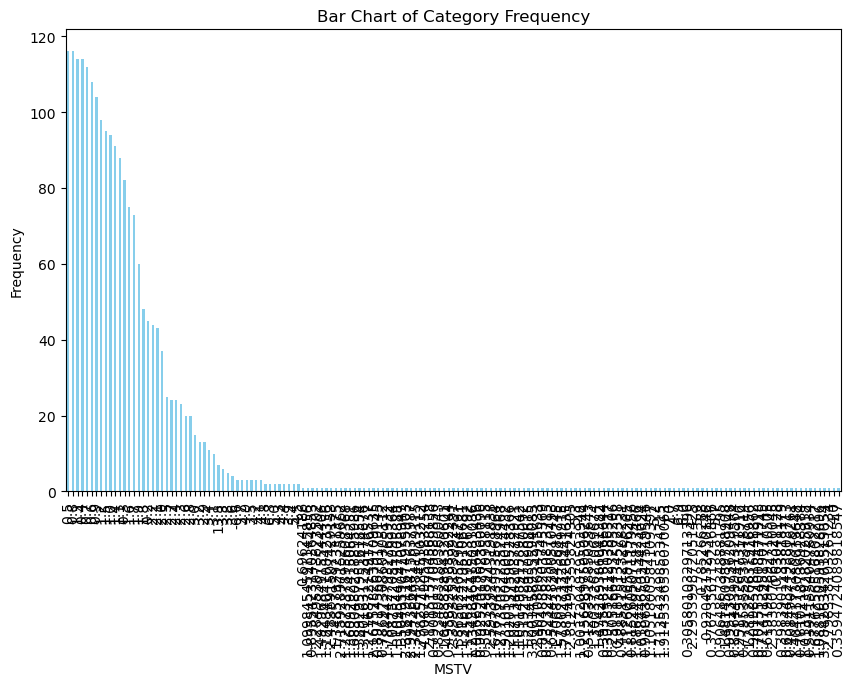

In [94]:
value_counts = df['MSTV'].value_counts()

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Bar Chart of Category Frequency')
plt.xlabel('MSTV')
plt.ylabel('Frequency')
plt.show()

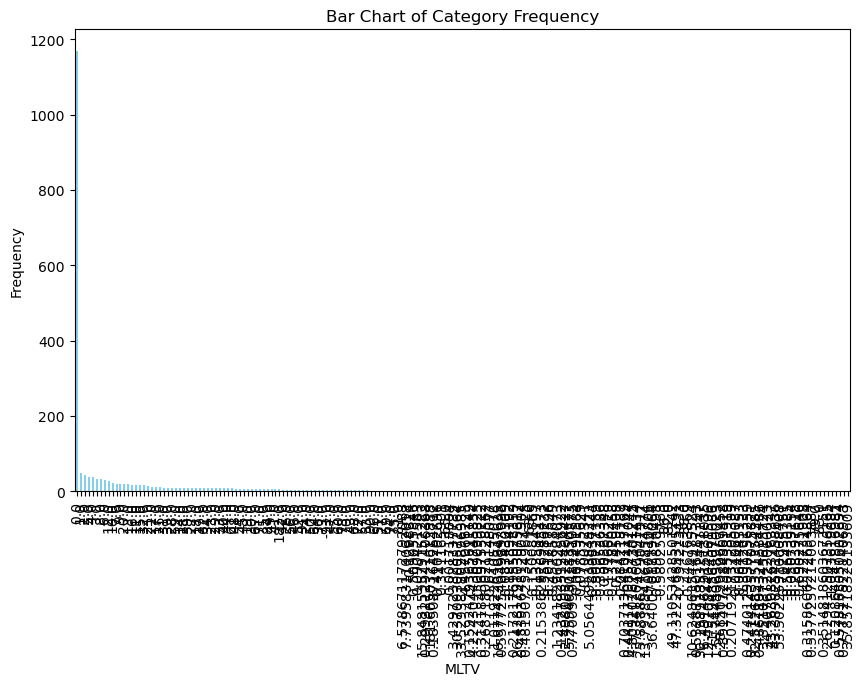

In [95]:
value_counts = df['ALTV'].value_counts()

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Bar Chart of Category Frequency')
plt.xlabel('MLTV')
plt.ylabel('Frequency')
plt.show()

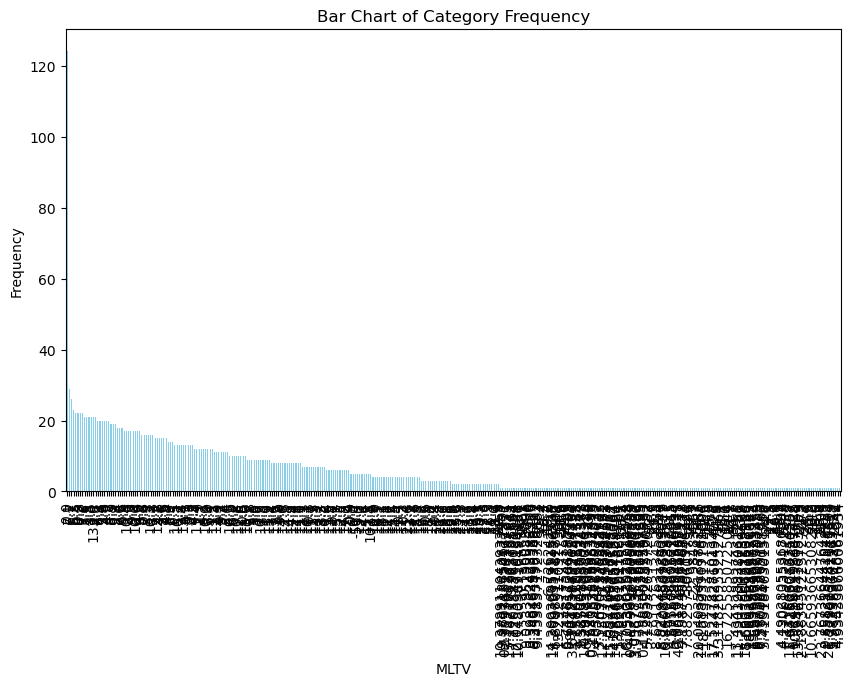

In [96]:
value_counts = df['MLTV'].value_counts()

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Bar Chart of Category Frequency')
plt.xlabel('MLTV')
plt.ylabel('Frequency')
plt.show()

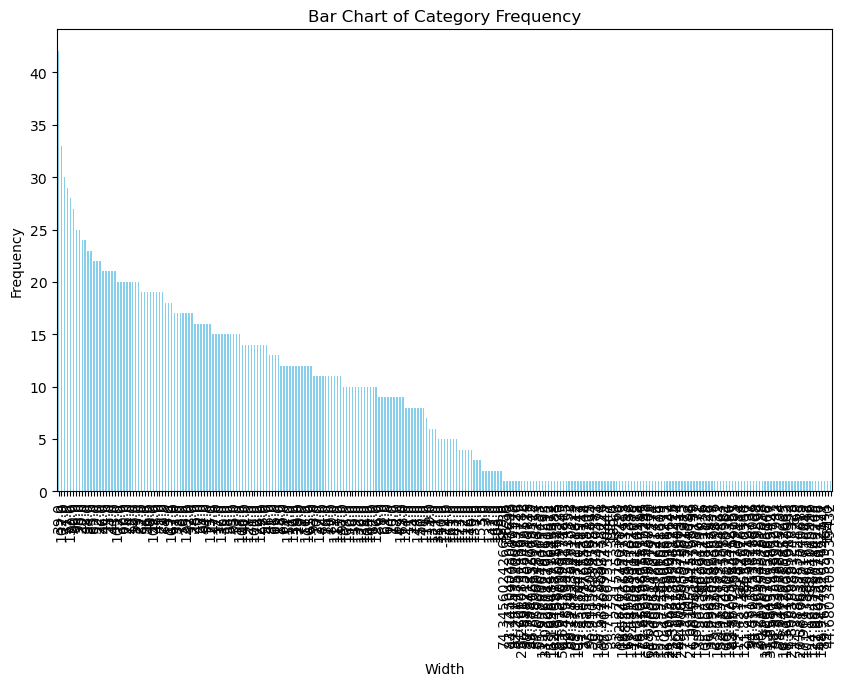

In [97]:
value_counts = df['Width'].value_counts()

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Bar Chart of Category Frequency')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.show()

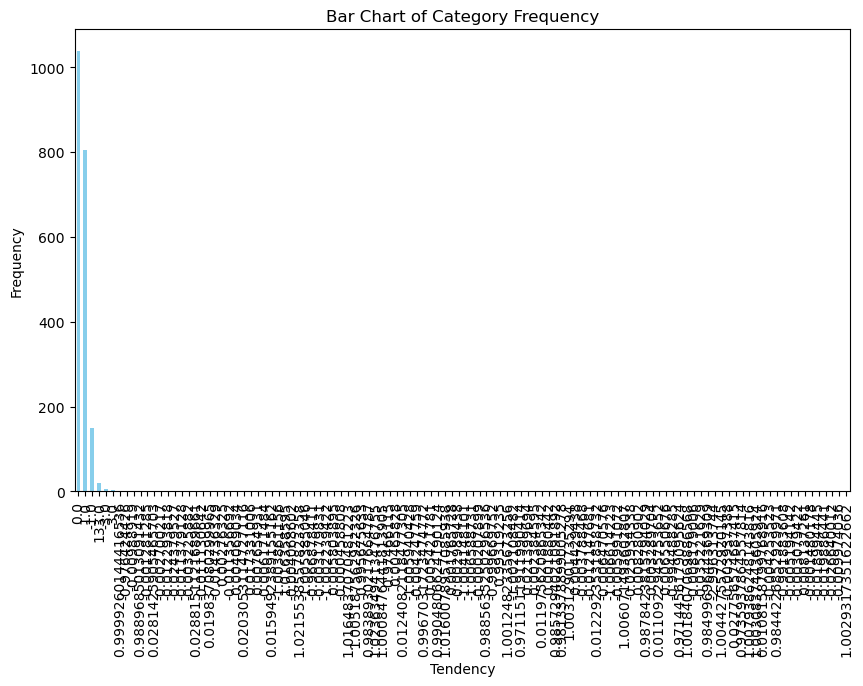

In [98]:
value_counts = df['Tendency'].value_counts()

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Bar Chart of Category Frequency')
plt.xlabel('Tendency')
plt.ylabel('Frequency')
plt.show()

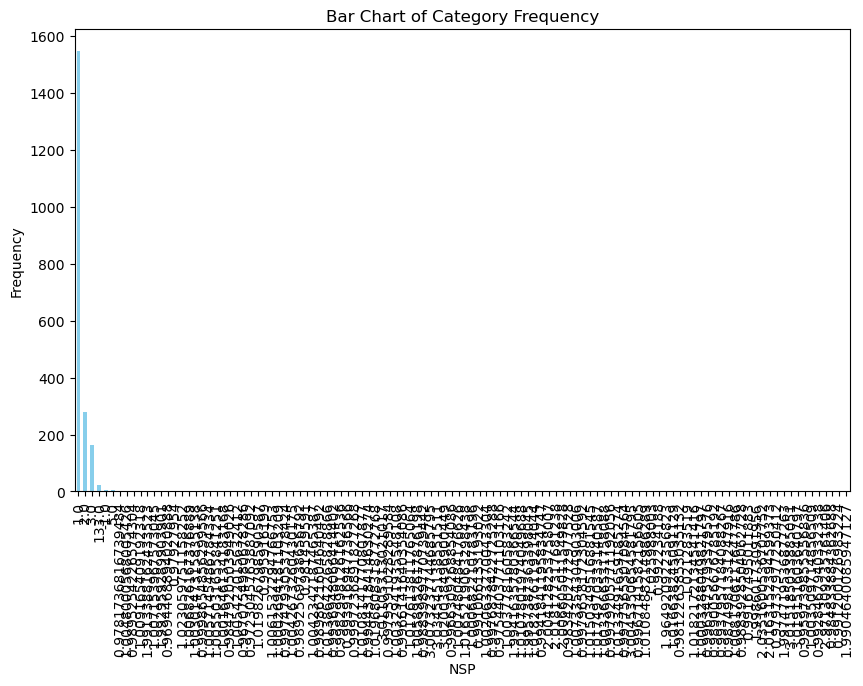

In [99]:
value_counts = df['NSP'].value_counts()

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Bar Chart of Category Frequency')
plt.xlabel('NSP')
plt.ylabel('Frequency')
plt.show()

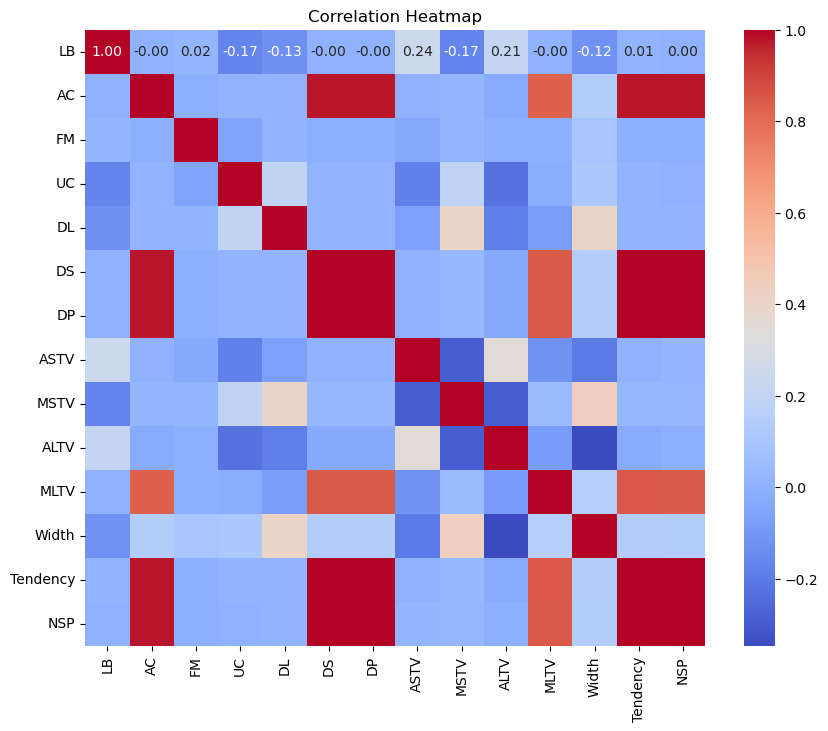

In [100]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1000x800 with 0 Axes>

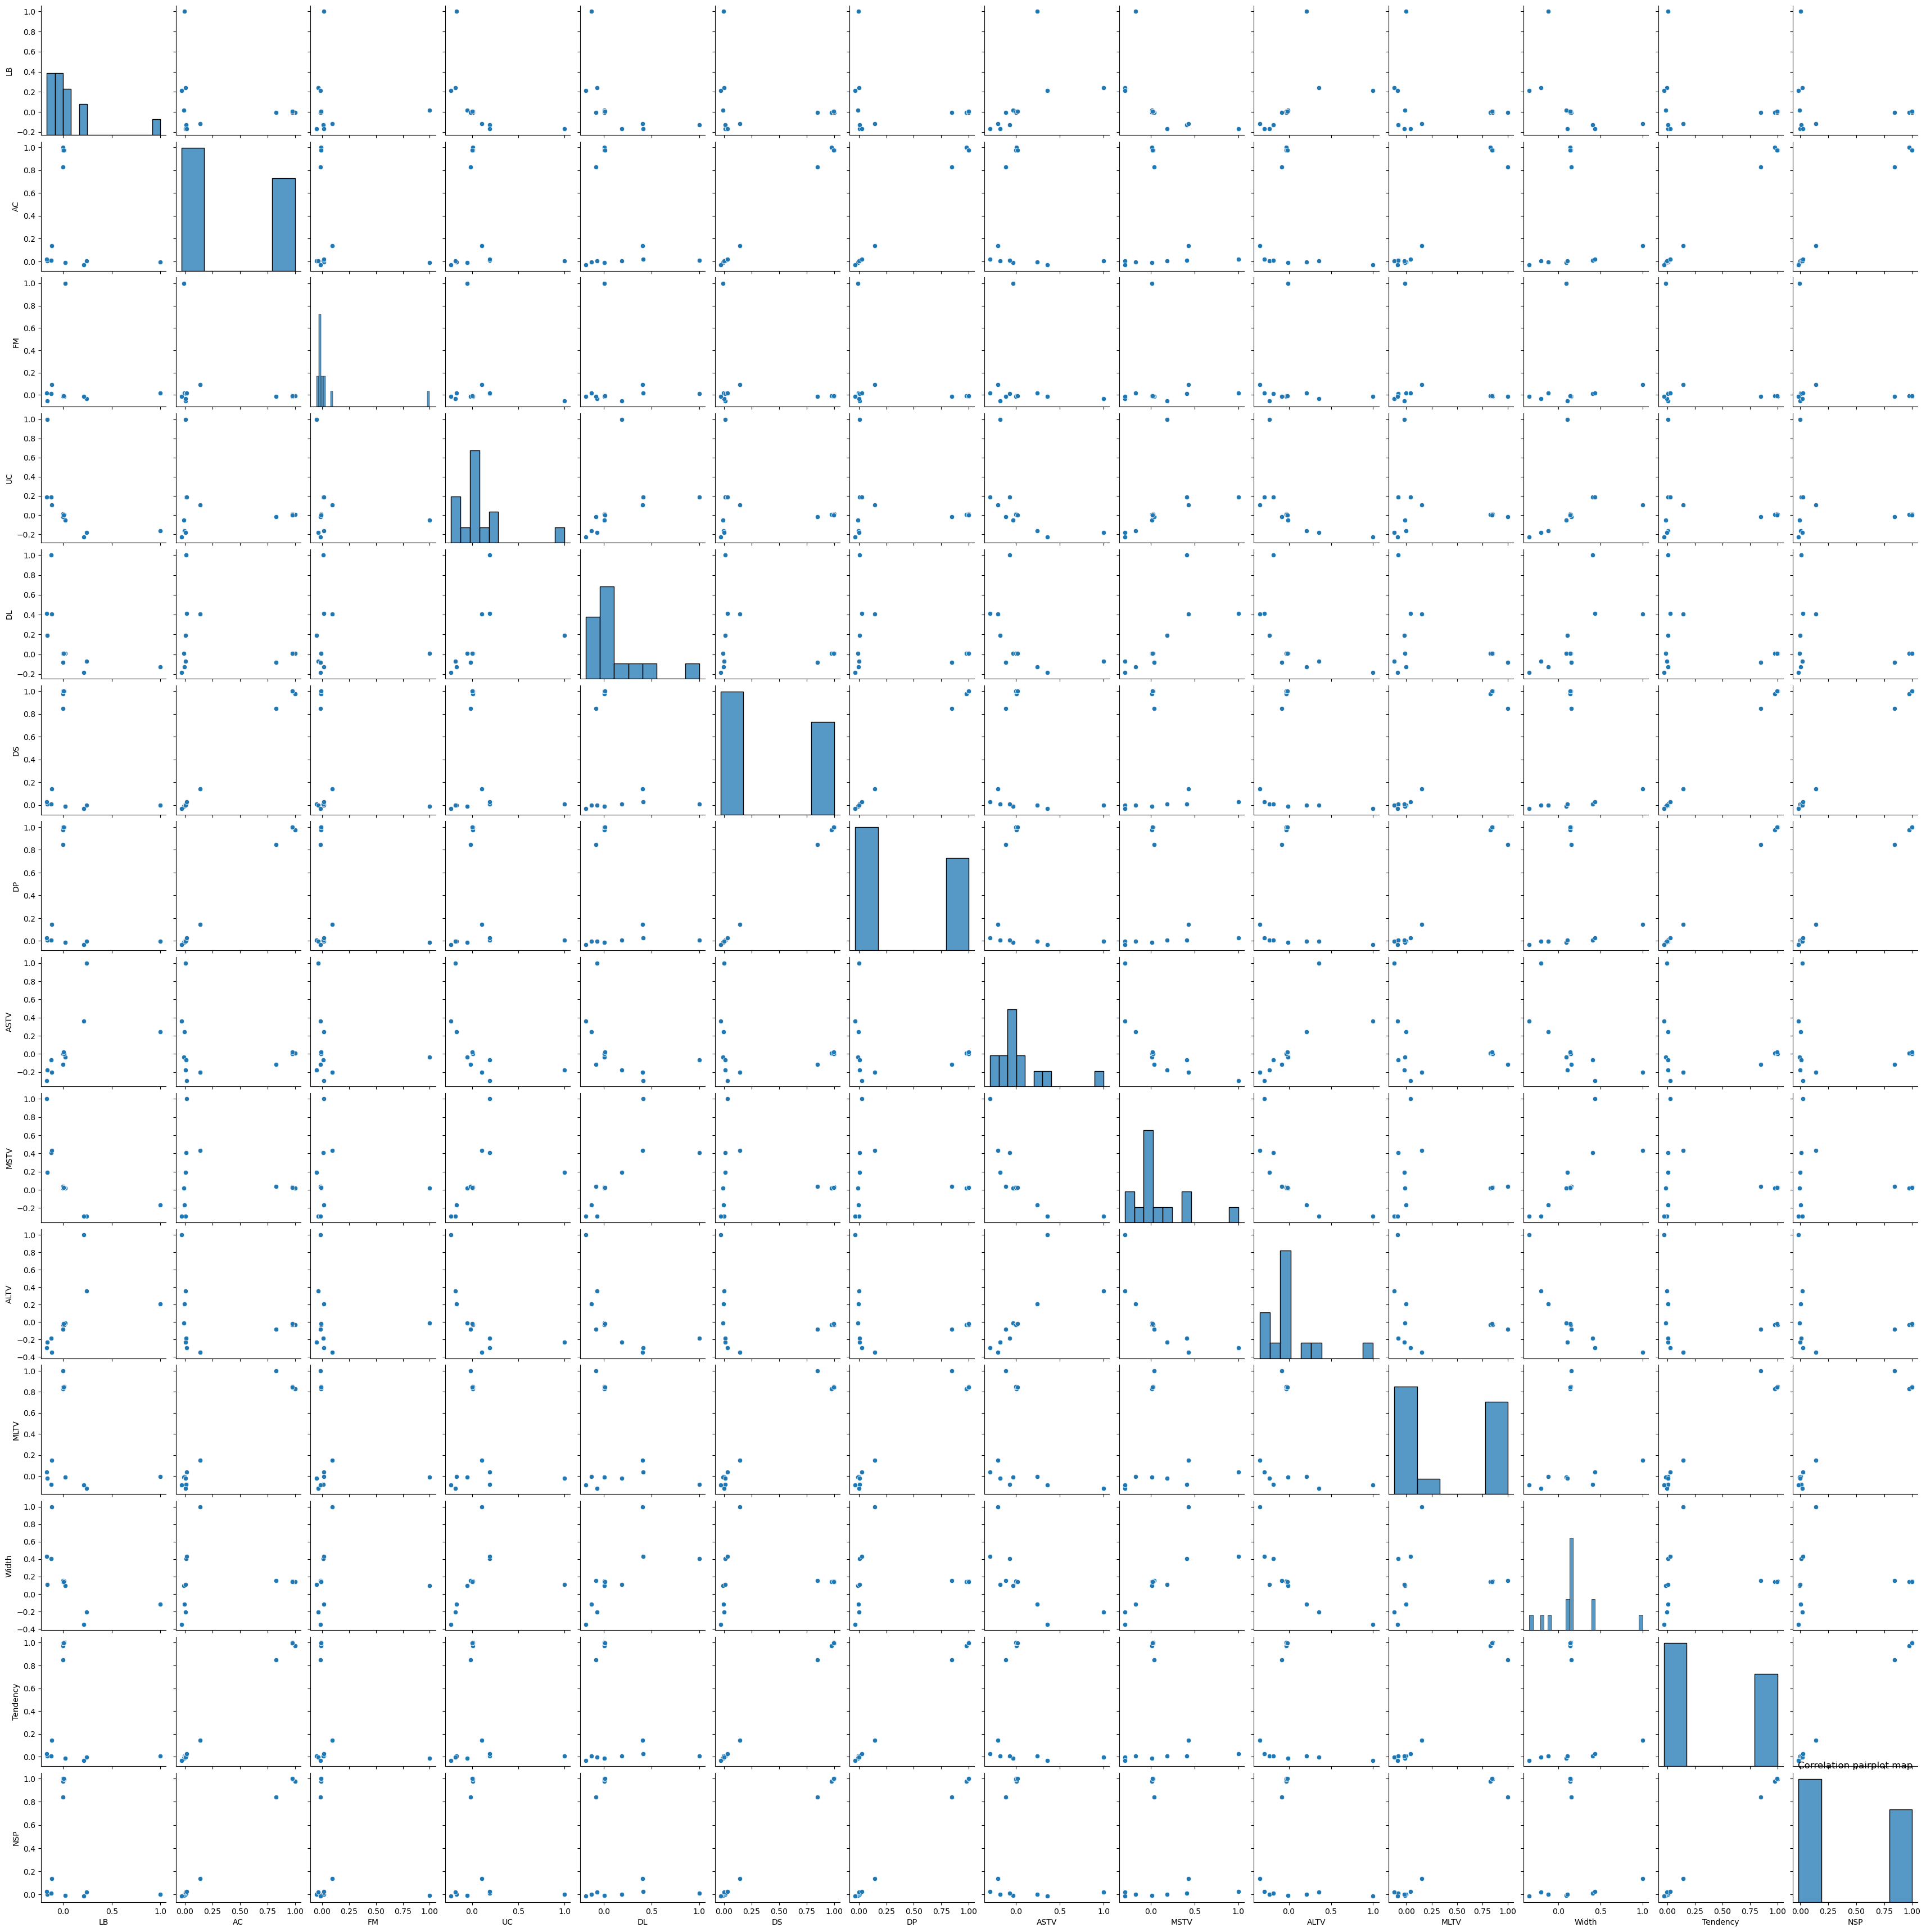

In [101]:
plt.figure(figsize=(10, 8))
sns.pairplot(df.corr())
plt.title('Correlation pairplot map')
plt.show()

# 4.	Pattern Recognition and Insights

In [136]:
from sklearn.preprocessing import StandardScaler 
from numpy import set_printoptions
array = df.values
scaler = StandardScaler()
scaler.fit(array)
rescaledX = scaler.transform(array)
set_printoptions(precision=2)
print(rescaledX[0:,:])


[[-1.19 -0.1  -0.15 ... -0.16 -0.05 -0.05]
 [-0.12 -0.1  -0.15 ...  1.37 -0.12 -0.12]
 [-0.03 -0.1  -0.15 ...  1.37 -0.12 -0.12]
 ...
 [ 0.59 -0.1  -0.15 ... -0.09 -0.05 -0.05]
 [ 0.59 -0.1  -0.15 ... -0.12 -0.05 -0.05]
 [ 0.77 -0.1  -0.15 ... -0.67 -0.12 -0.12]]


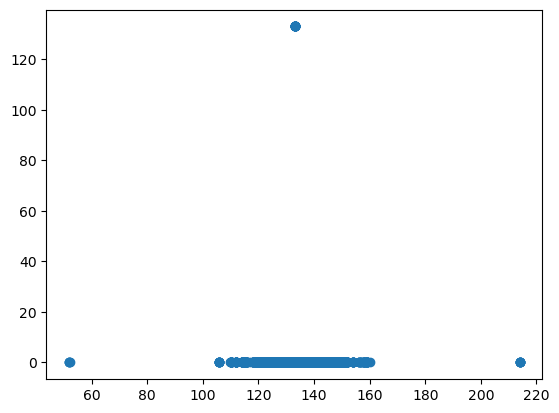

In [137]:
plt.scatter(df['LB'],df['AC'])

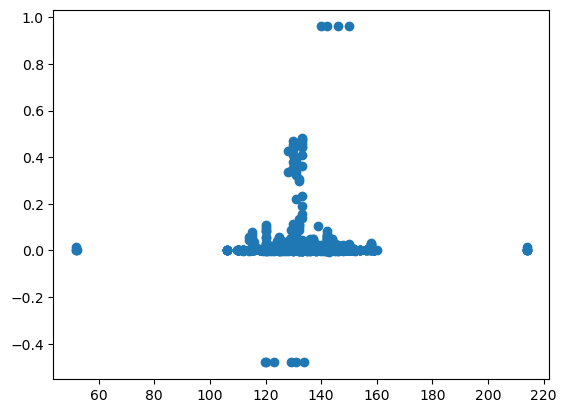

In [138]:
plt.scatter(df['LB'],df['FM'])

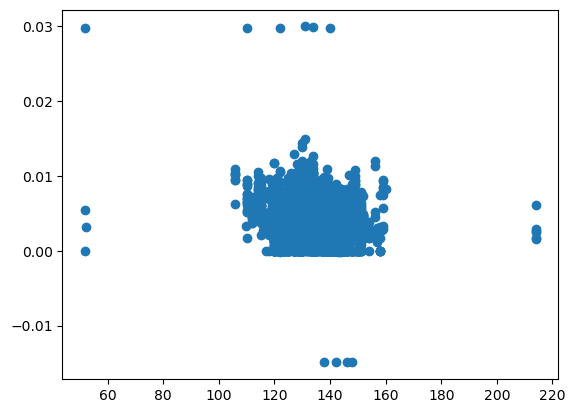

In [139]:
plt.scatter(df['LB'],df['UC'])

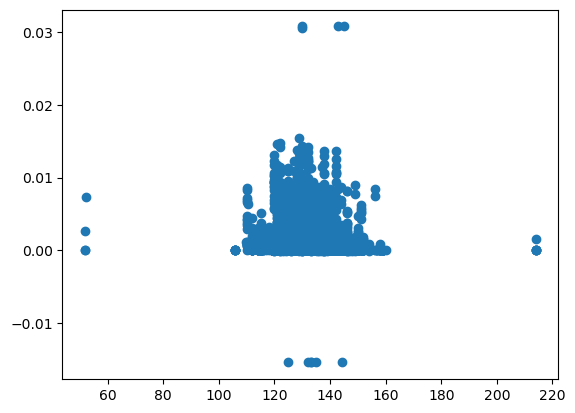

In [140]:
plt.scatter(df['LB'],df['DL'])

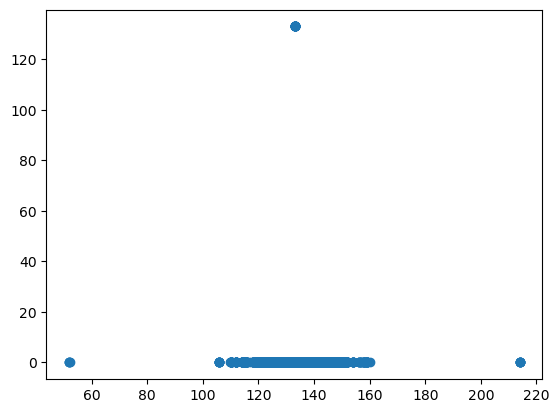

In [141]:
plt.scatter(df['LB'],df['DS'])

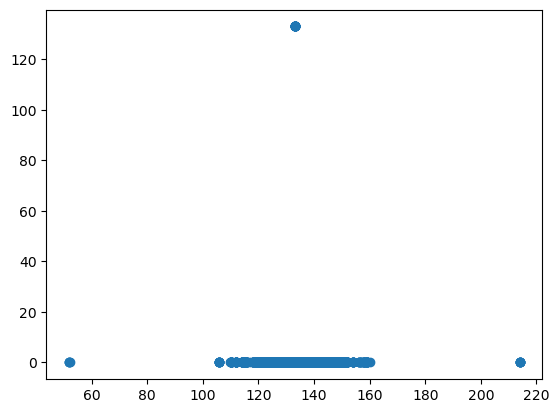

In [142]:
plt.scatter(df['LB'],df['DP'])

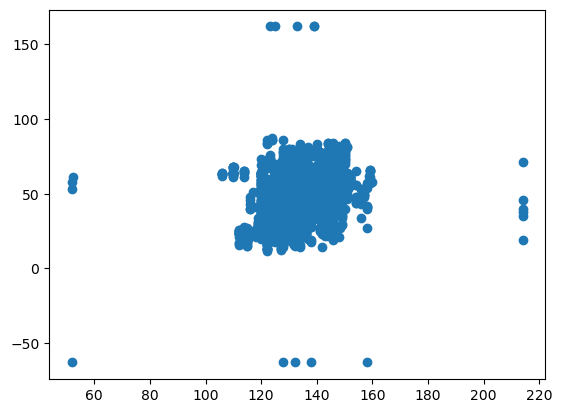

In [143]:
plt.scatter(df['LB'],df['ASTV'])

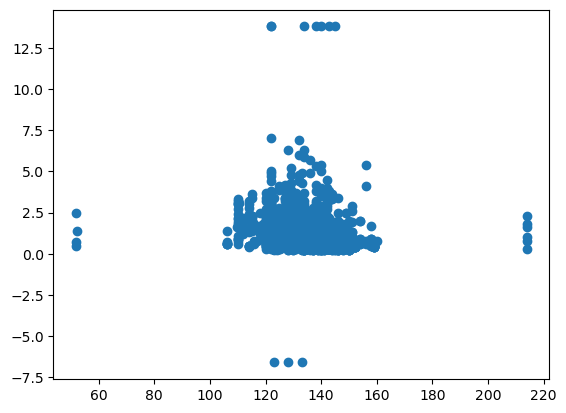

In [144]:
plt.scatter(df['LB'],df['MSTV'])

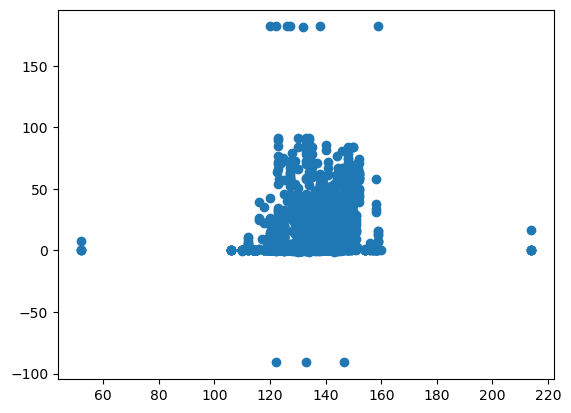

In [145]:
plt.scatter(df['LB'],df['ALTV'])

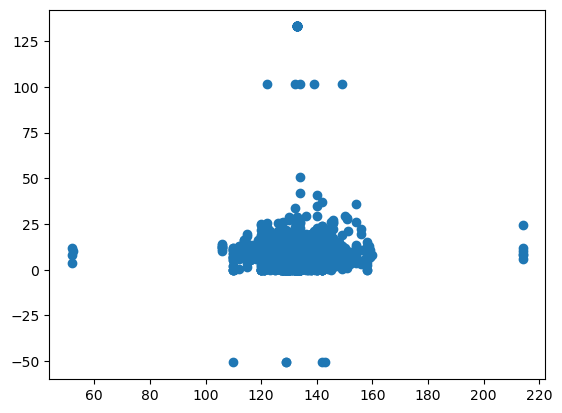

In [146]:
plt.scatter(df['LB'],df['MLTV'])

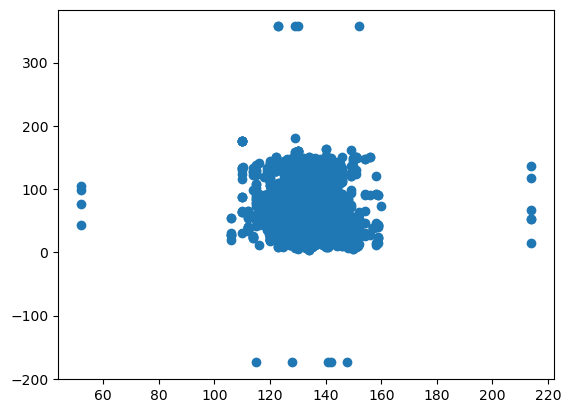

In [147]:
plt.scatter(df['LB'],df['Width'])

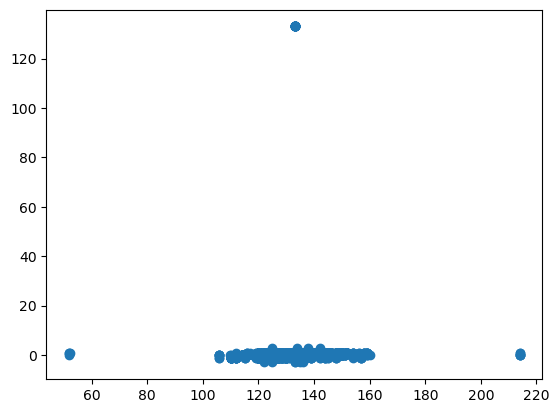

In [148]:
plt.scatter(df['LB'],df['Tendency'])

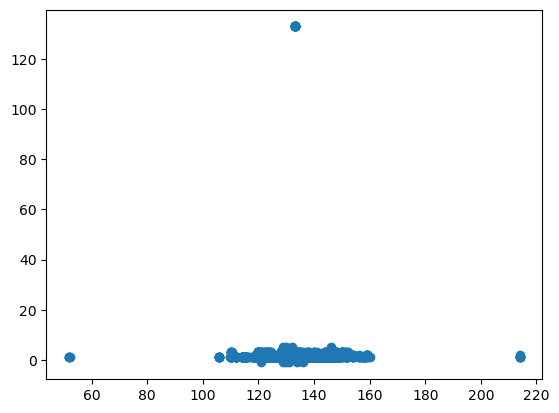

In [149]:
plt.scatter(df['LB'],df['NSP'])

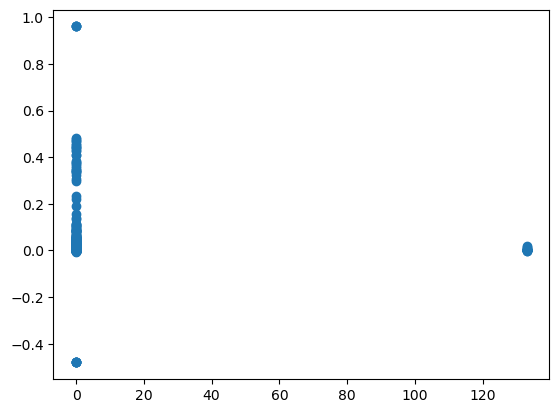

In [150]:
plt.scatter(df['AC'],df['FM'])

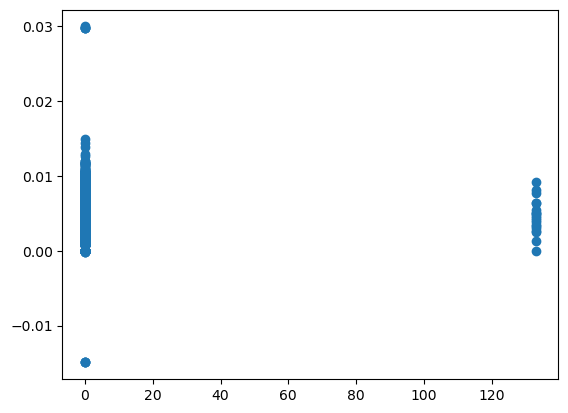

In [151]:
plt.scatter(df['AC'],df['UC'])

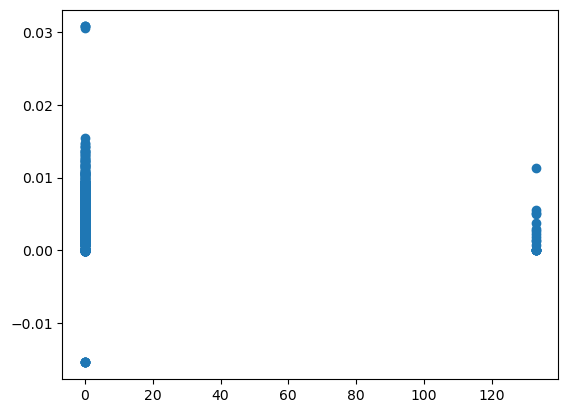

In [152]:
plt.scatter(df['AC'],df['DL'])

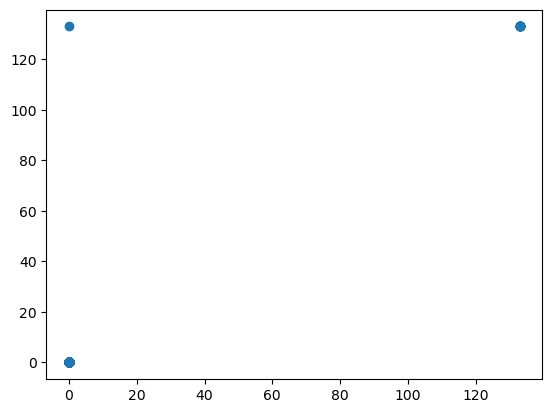

In [153]:
plt.scatter(df['AC'],df['DS'])

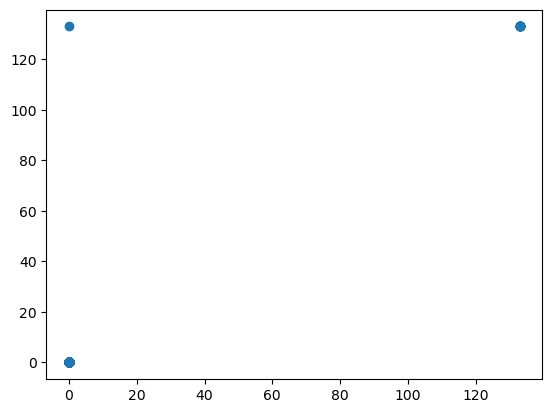

In [154]:
plt.scatter(df['AC'],df['DP'])

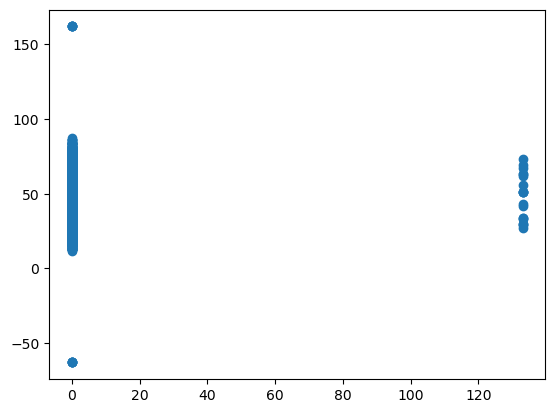

In [155]:
plt.scatter(df['AC'],df['ASTV'])

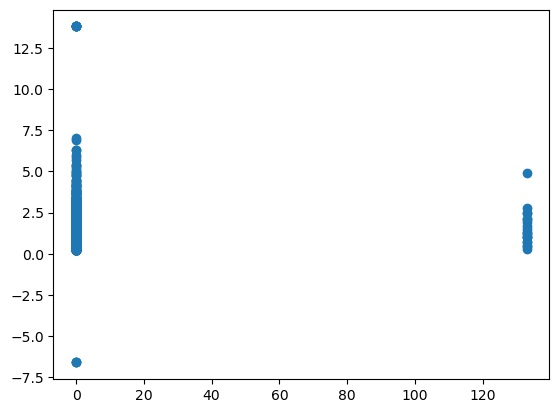

In [156]:
plt.scatter(df['AC'],df['MSTV'])

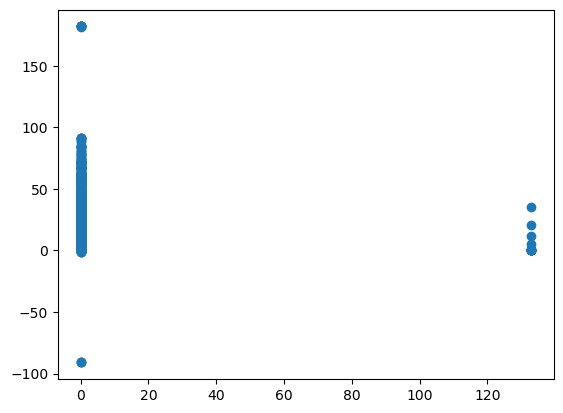

In [157]:
plt.scatter(df['AC'],df['ALTV'])

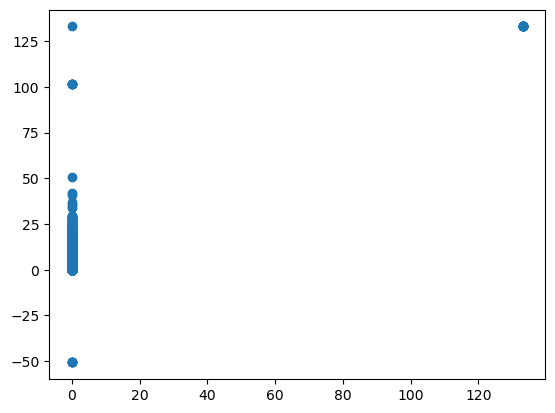

In [158]:
plt.scatter(df['AC'],df['MLTV'])

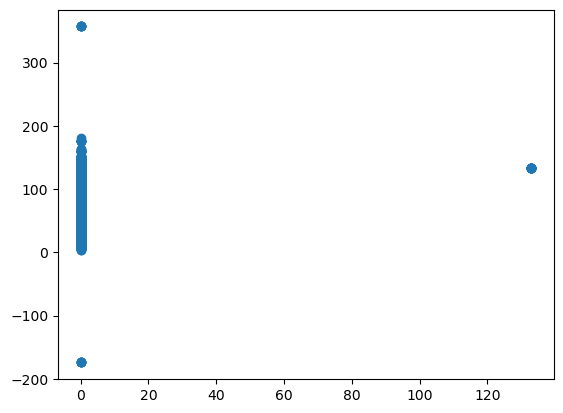

In [159]:
plt.scatter(df['AC'],df['Width'])

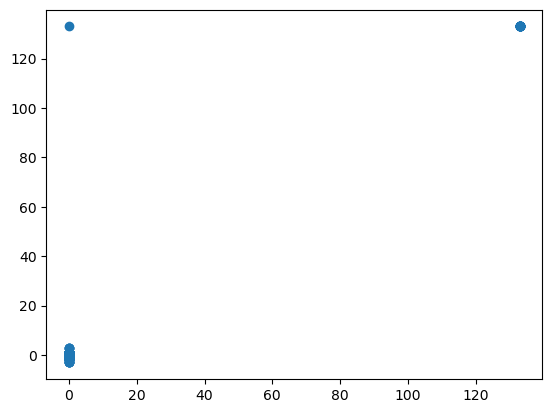

In [160]:
plt.scatter(df['AC'],df['Tendency'])

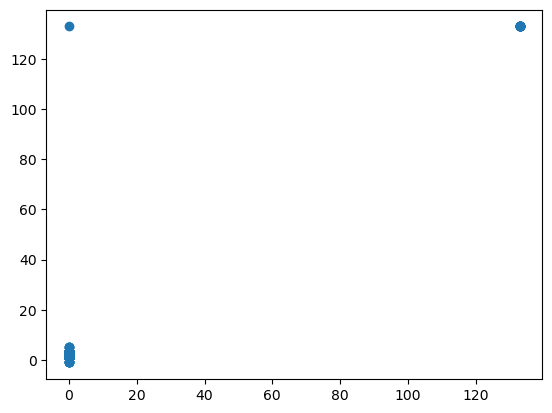

In [161]:
plt.scatter(df['AC'],df['NSP'])

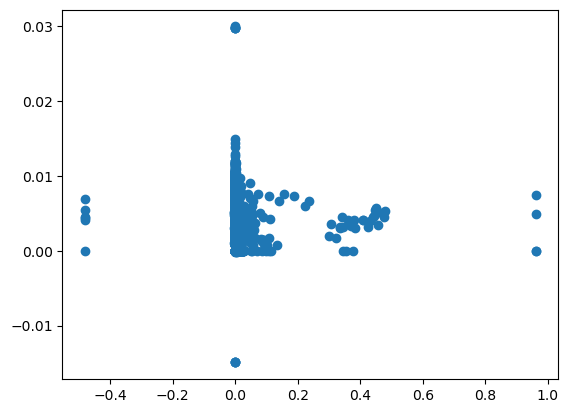

In [165]:
plt.scatter(df['FM'],df['UC'])

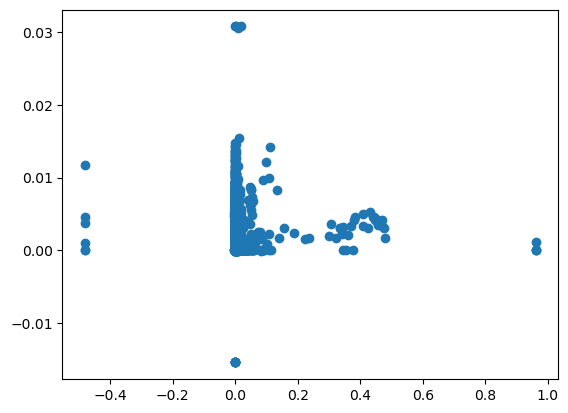

In [166]:
plt.scatter(df['FM'],df['DL'])

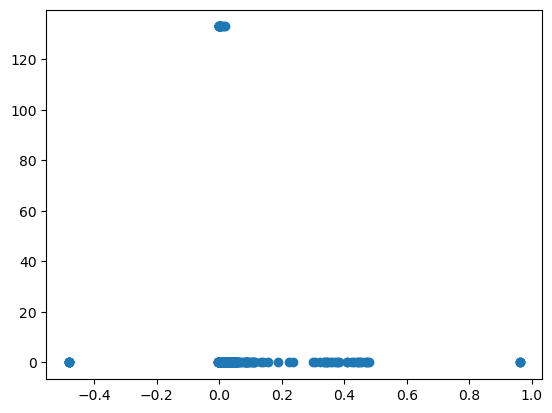

In [169]:
plt.scatter(df['FM'],df['DS'])

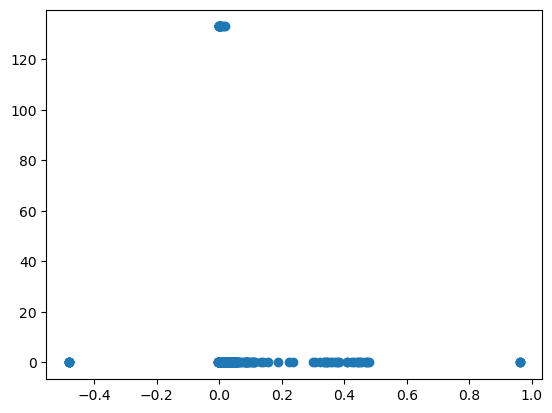

In [170]:
plt.scatter(df['FM'],df['DP'])

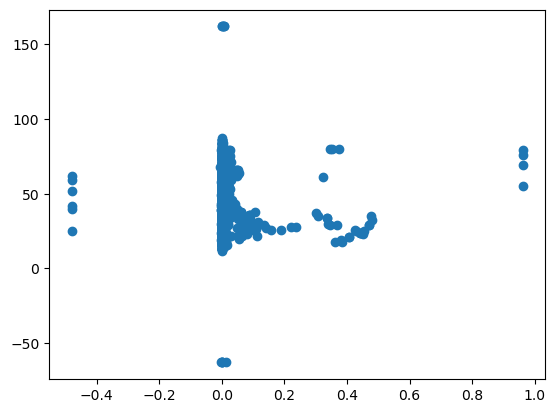

In [171]:
plt.scatter(df['FM'],df['ASTV'])

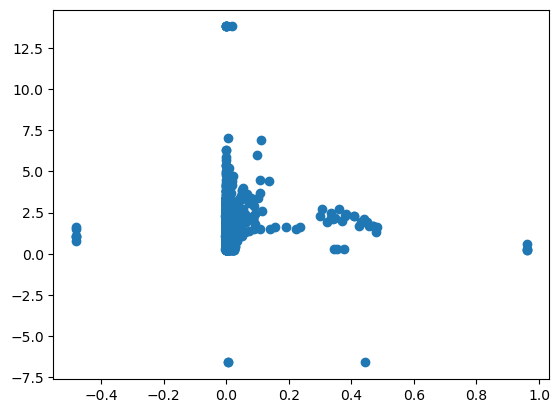

In [172]:
plt.scatter(df['FM'],df['MSTV'])

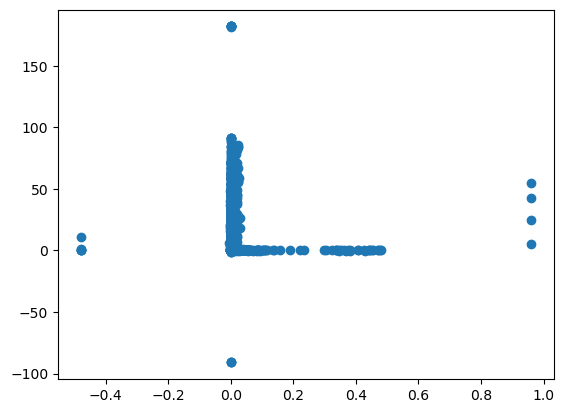

In [173]:
plt.scatter(df['FM'],df['ALTV'])

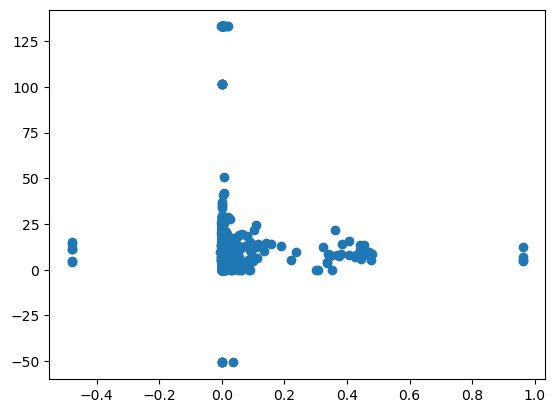

In [174]:
plt.scatter(df['FM'],df['MLTV'])

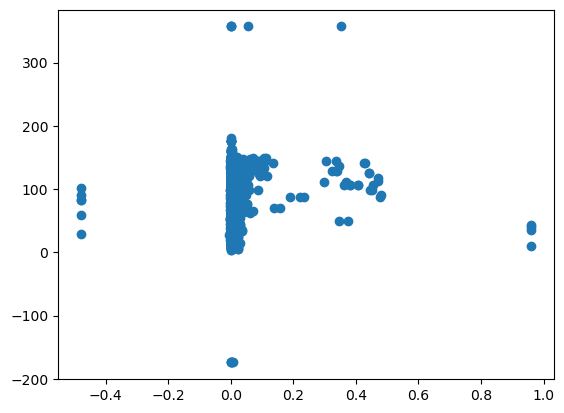

In [175]:
plt.scatter(df['FM'],df['Width'])

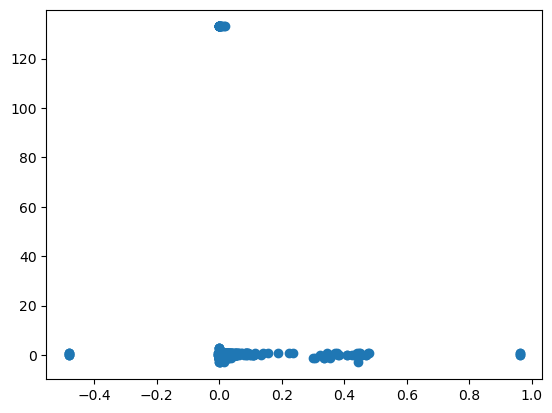

In [176]:
plt.scatter(df['FM'],df['Tendency'])

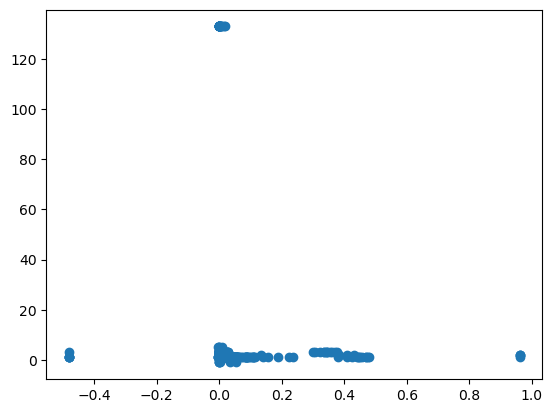

In [177]:
plt.scatter(df['FM'],df['NSP'])

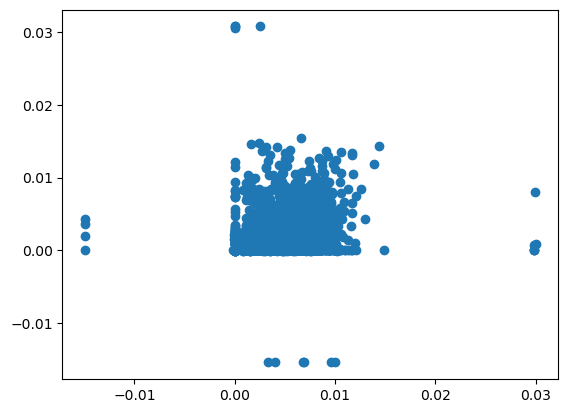

In [178]:
plt.scatter(df['UC'],df['DL'])

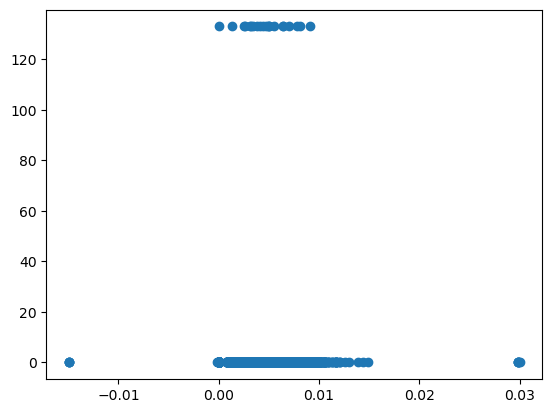

In [179]:
plt.scatter(df['UC'],df['DS'])

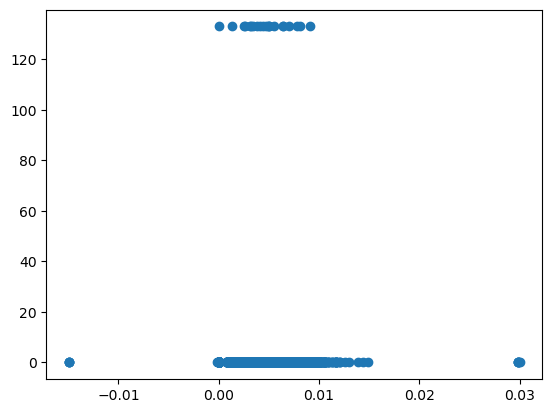

In [180]:
plt.scatter(df['UC'],df['DP'])

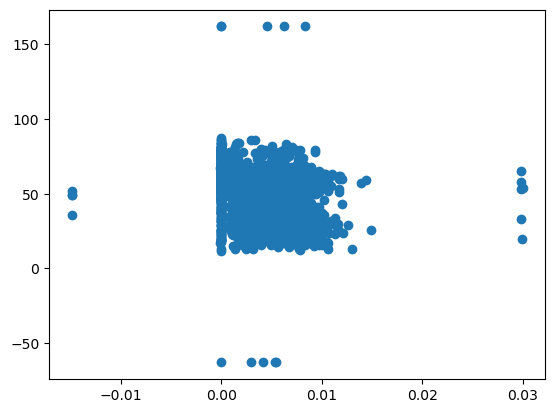

In [181]:
plt.scatter(df['UC'],df['ASTV'])

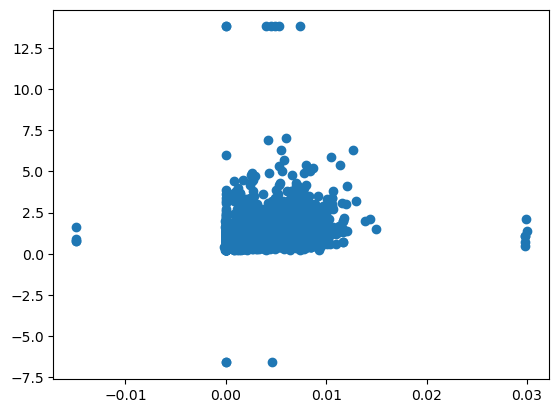

In [182]:
plt.scatter(df['UC'],df['MSTV'])

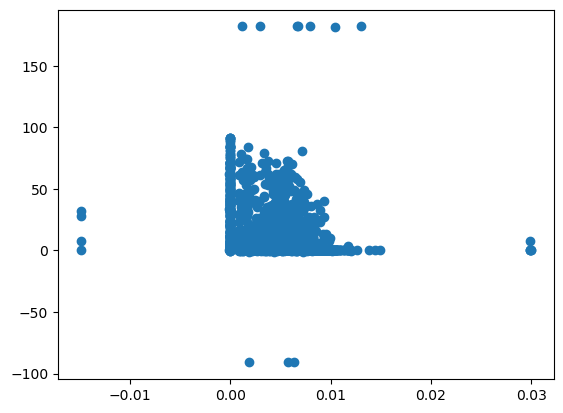

In [183]:
plt.scatter(df['UC'],df['ALTV'])

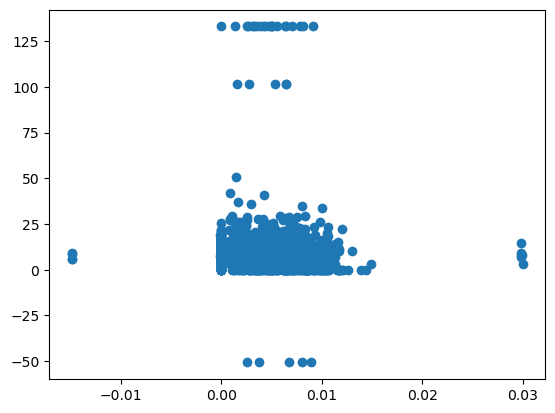

In [184]:
plt.scatter(df['UC'],df['MLTV'])

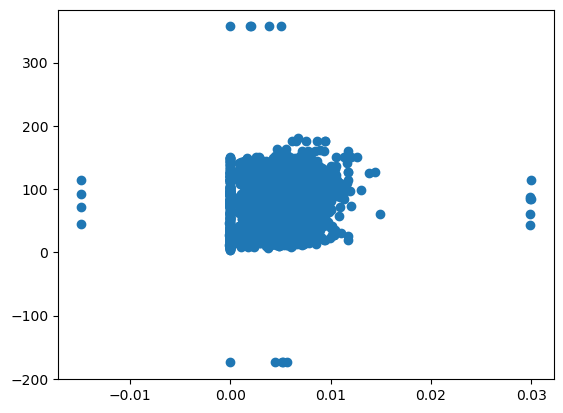

In [185]:
plt.scatter(df['UC'],df['Width'])

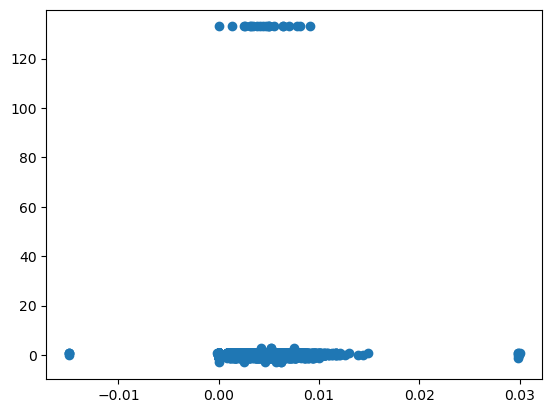

In [186]:
plt.scatter(df['UC'],df['Tendency'])

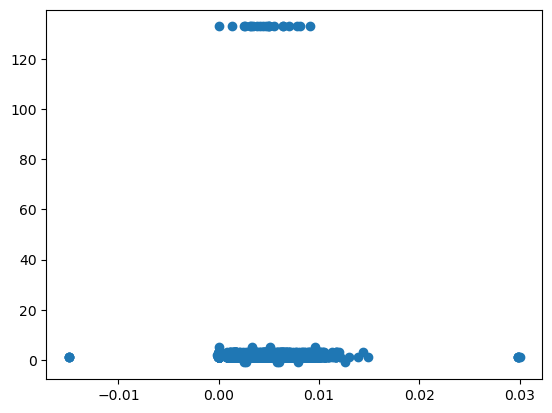

In [187]:
plt.scatter(df['UC'],df['NSP'])

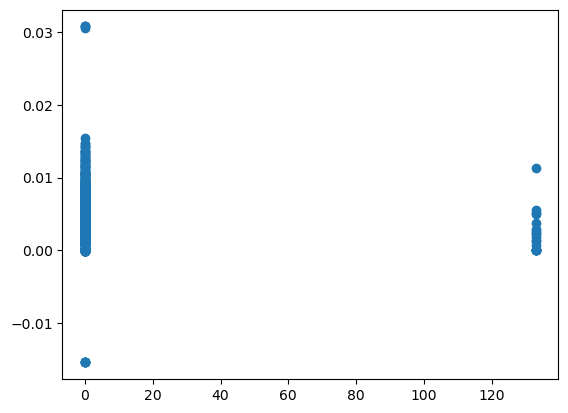

In [188]:
plt.scatter(df['DS'],df['DL'])

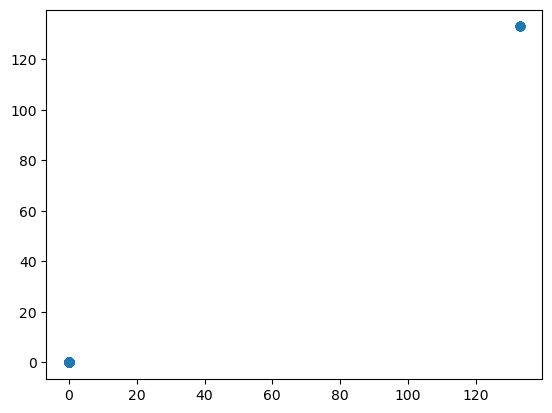

In [189]:
plt.scatter(df['DS'],df['DP'])

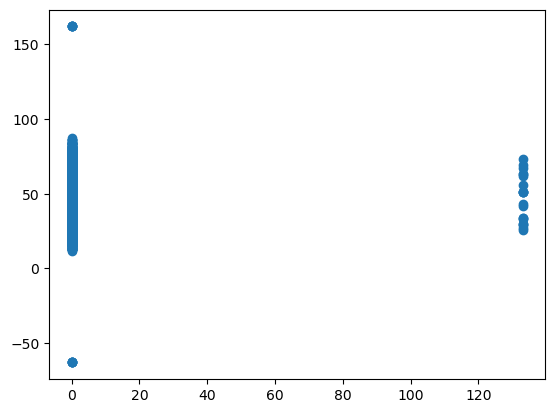

In [190]:
plt.scatter(df['DS'],df['ASTV'])

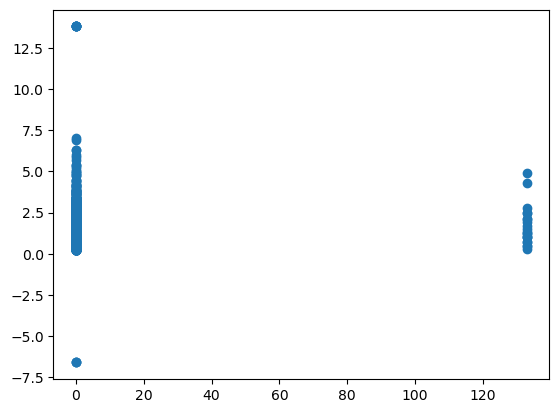

In [191]:
plt.scatter(df['DS'],df['MSTV'])

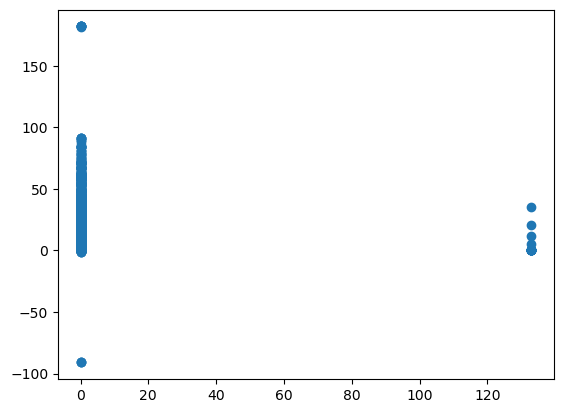

In [192]:
plt.scatter(df['DS'],df['ALTV'])

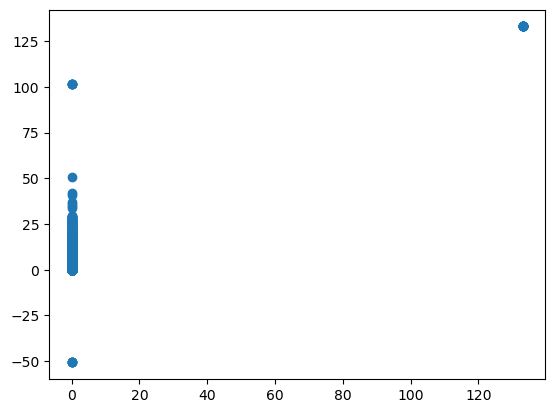

In [193]:
plt.scatter(df['DS'],df['MLTV'])

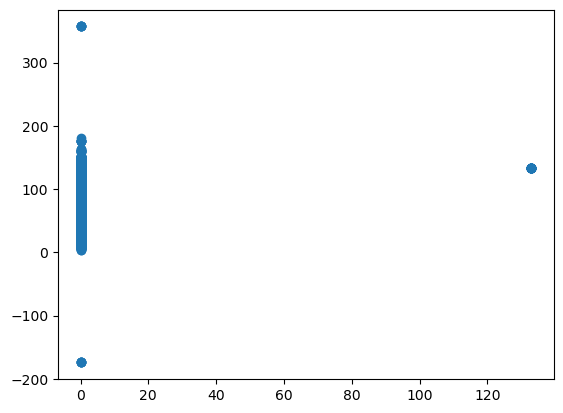

In [194]:
plt.scatter(df['DS'],df['Width'])

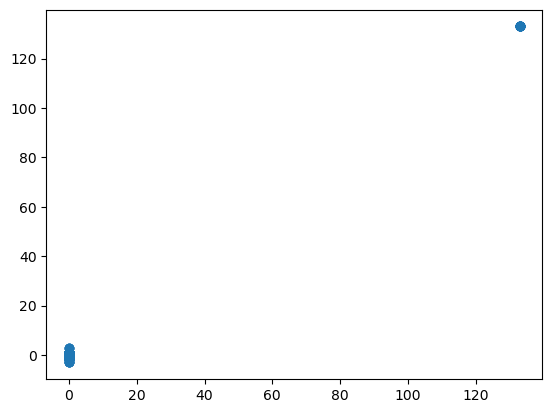

In [195]:
plt.scatter(df['DS'],df['Tendency'])

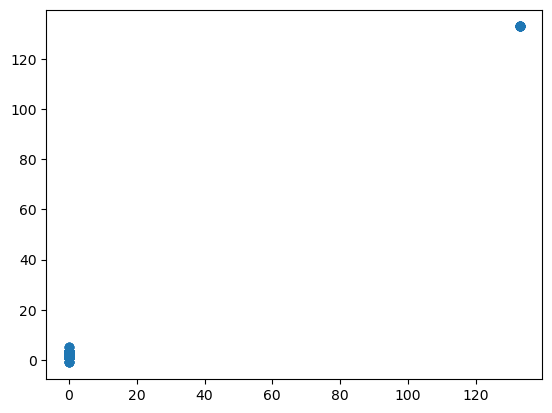

In [196]:
plt.scatter(df['DS'],df['NSP'])

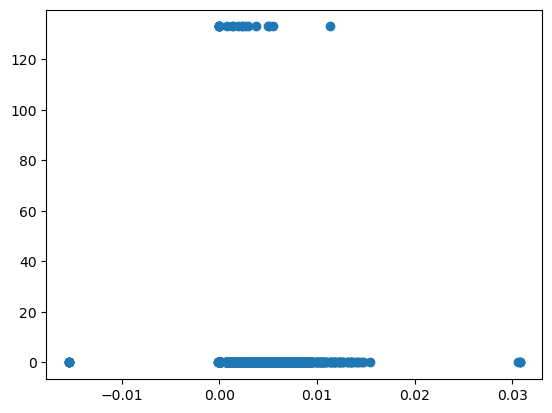

In [197]:
plt.scatter(df['DL'],df['DP'])

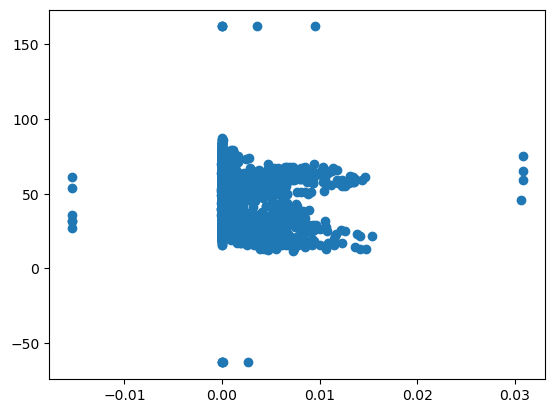

In [198]:
plt.scatter(df['DL'],df['ASTV'])

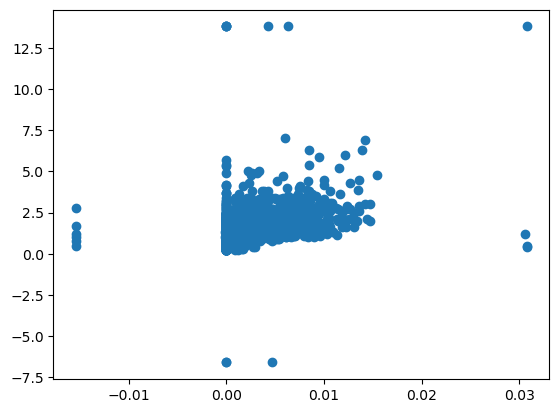

In [199]:
plt.scatter(df['DL'],df['MSTV'])

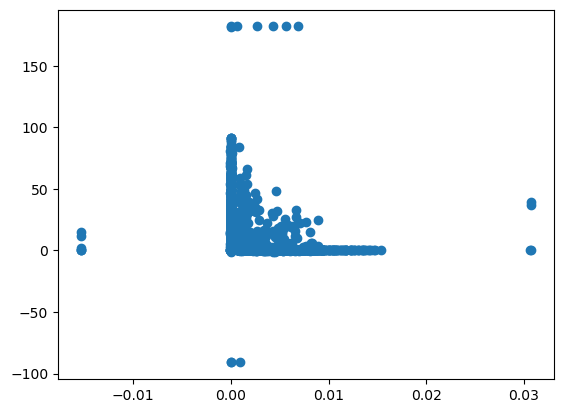

In [200]:
plt.scatter(df['DL'],df['ALTV'])

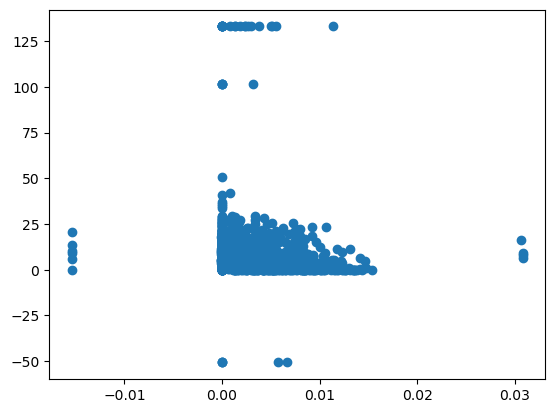

In [201]:
plt.scatter(df['DL'],df['MLTV'])

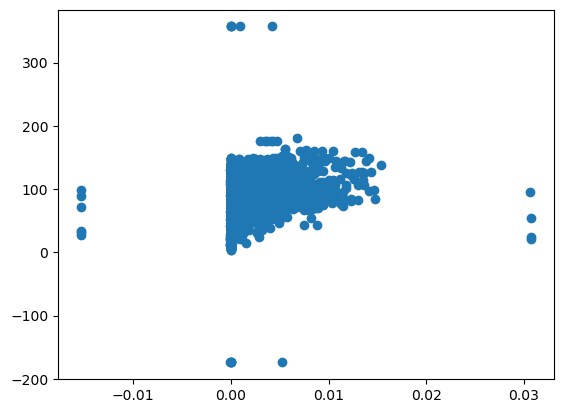

In [202]:
plt.scatter(df['DL'],df['Width'])

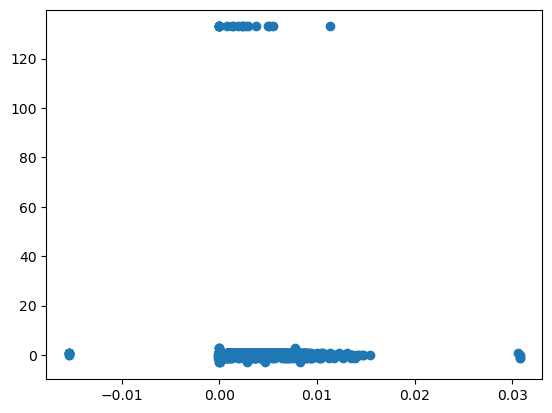

In [203]:
plt.scatter(df['DL'],df['Tendency'])

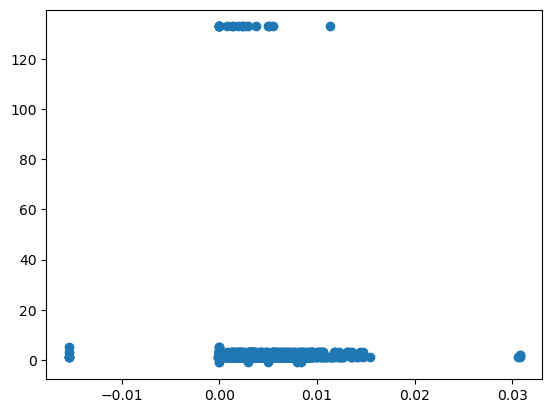

In [204]:
plt.scatter(df['DL'],df['NSP'])

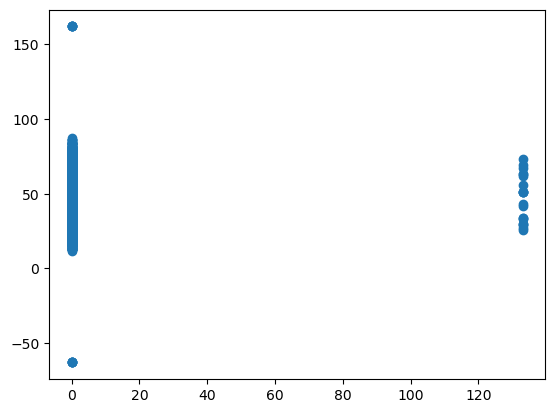

In [206]:
plt.scatter(df['DP'],df['ASTV'])

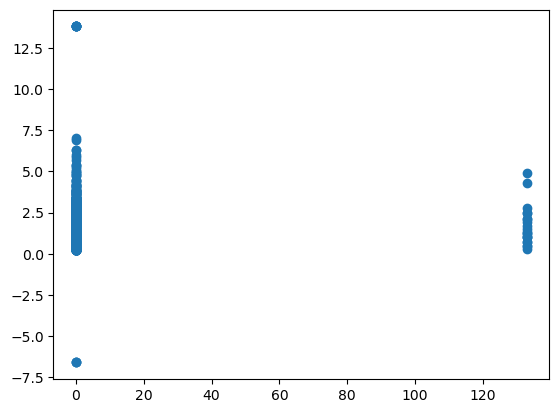

In [207]:
plt.scatter(df['DP'],df['MSTV'])

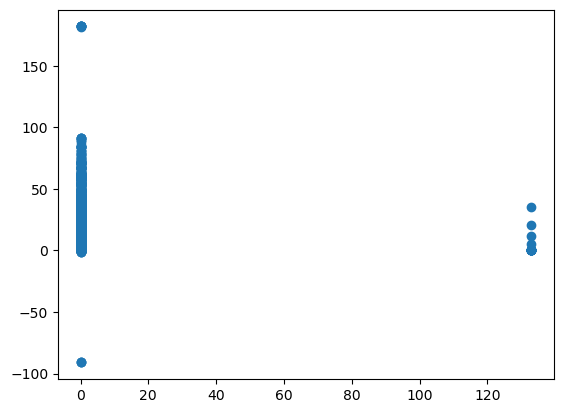

In [208]:
plt.scatter(df['DP'],df['ALTV'])

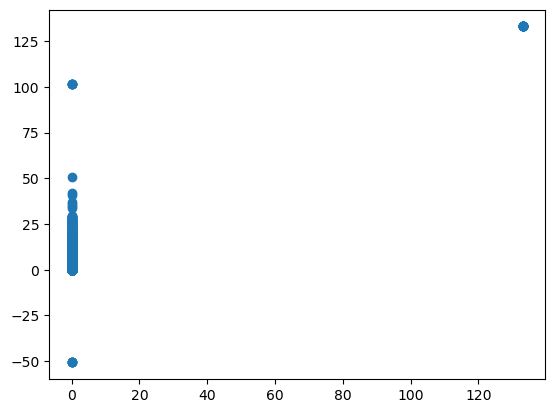

In [209]:
plt.scatter(df['DP'],df['MLTV'])

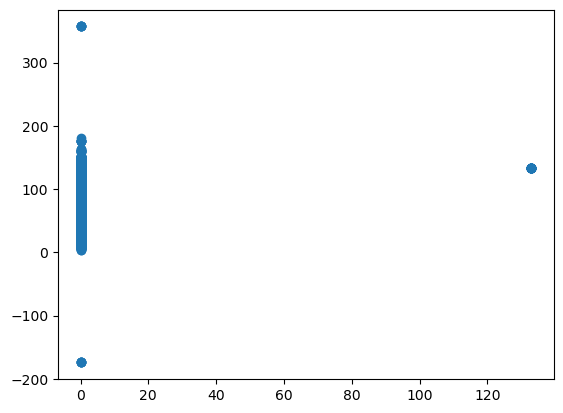

In [243]:
plt.scatter(df['DP'],df['Width'])

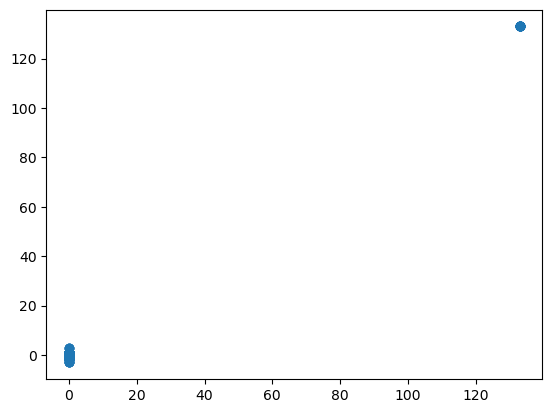

In [242]:
plt.scatter(df['DP'],df['Tendency'])

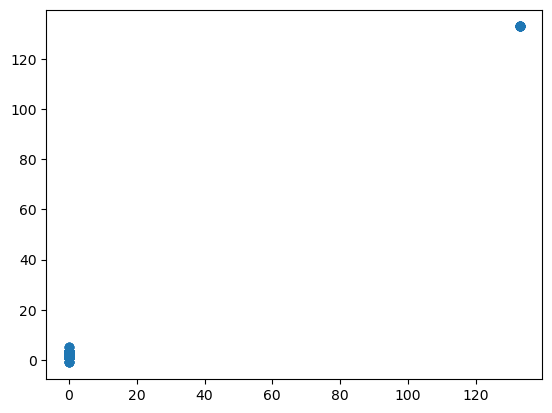

In [241]:
plt.scatter(df['DP'],df['NSP'])

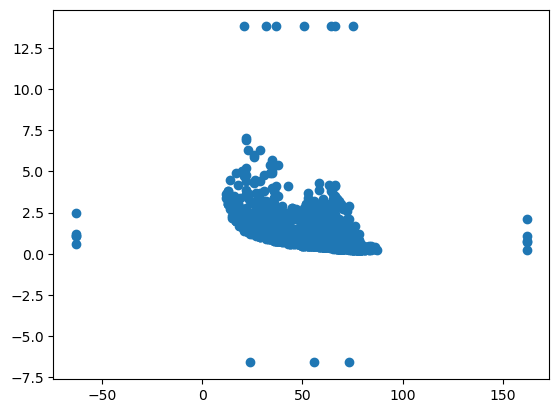

In [240]:
plt.scatter(df['ASTV'],df['MSTV'])

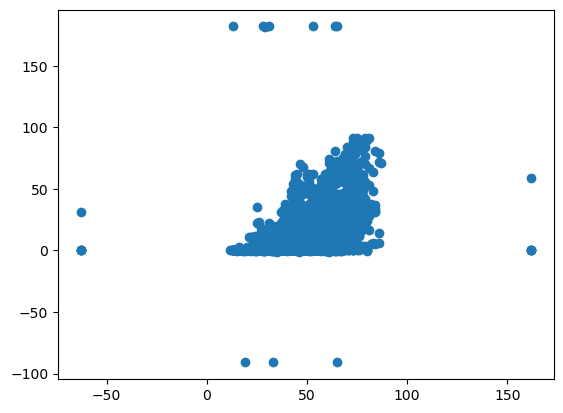

In [218]:
plt.scatter(df['ASTV'],df['ALTV'])

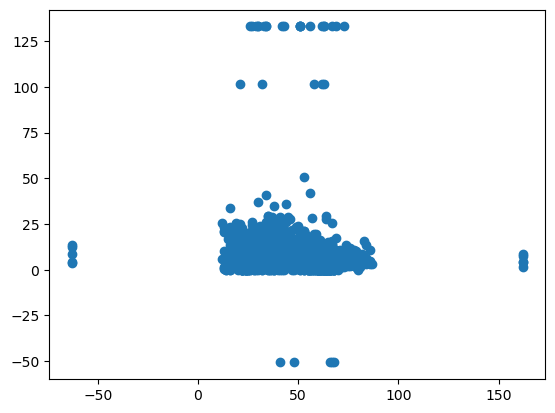

In [219]:
plt.scatter(df['ASTV'],df['MLTV'])

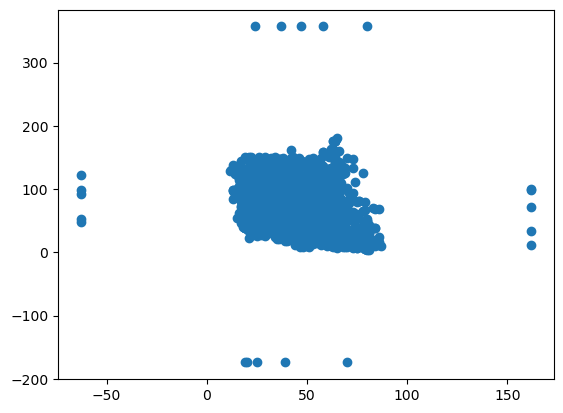

In [220]:
plt.scatter(df['ASTV'],df['Width'])

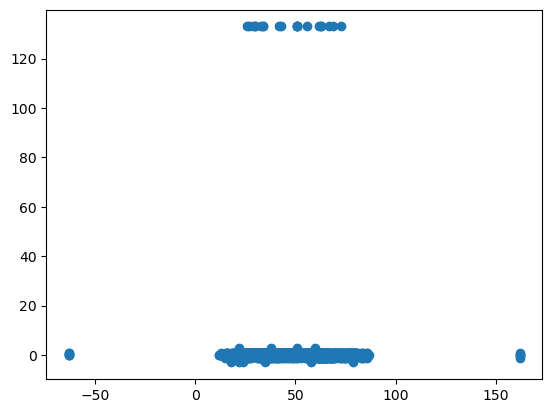

In [221]:
plt.scatter(df['ASTV'],df['Tendency'])

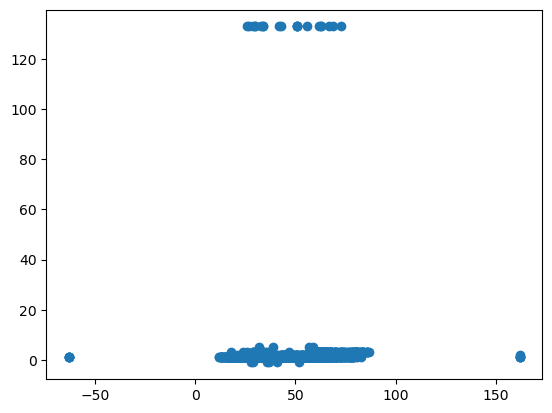

In [222]:
plt.scatter(df['ASTV'],df['NSP'])

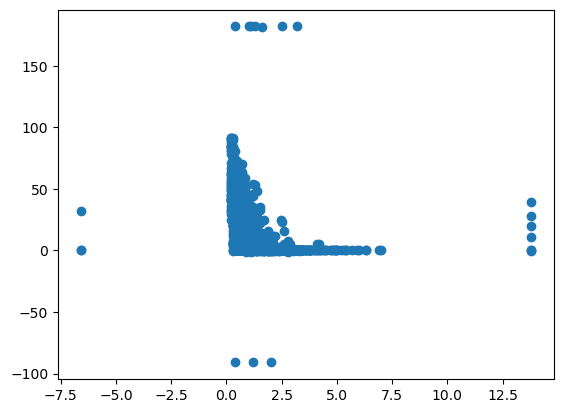

In [223]:
plt.scatter(df['MSTV'],df['ALTV'])

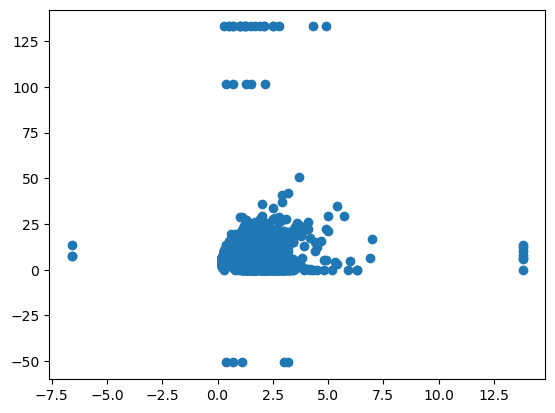

In [224]:
plt.scatter(df['MSTV'],df['MLTV'])

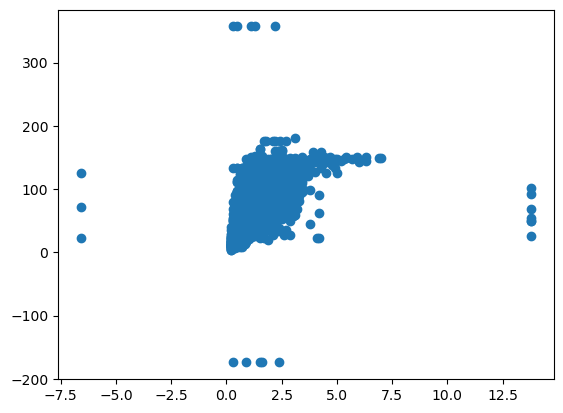

In [225]:
plt.scatter(df['MSTV'],df['Width'])

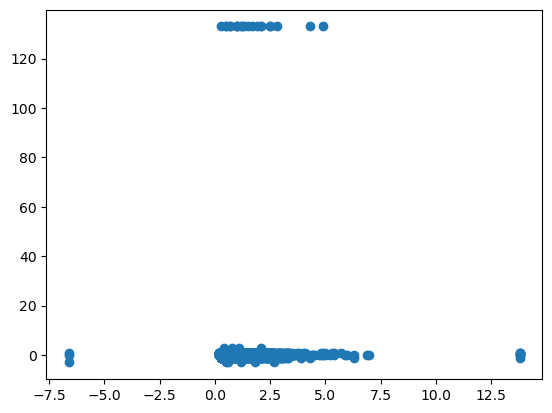

In [226]:
plt.scatter(df['MSTV'],df['Tendency'])

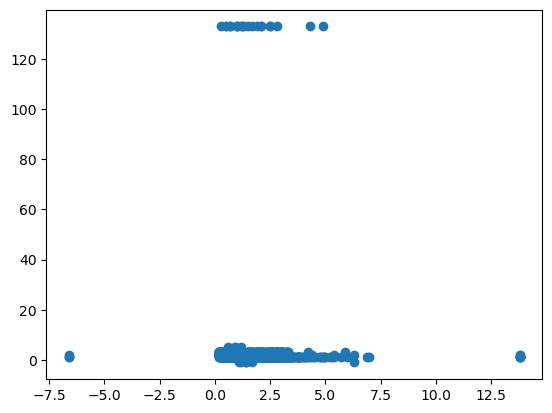

In [227]:
plt.scatter(df['MSTV'],df['NSP'])

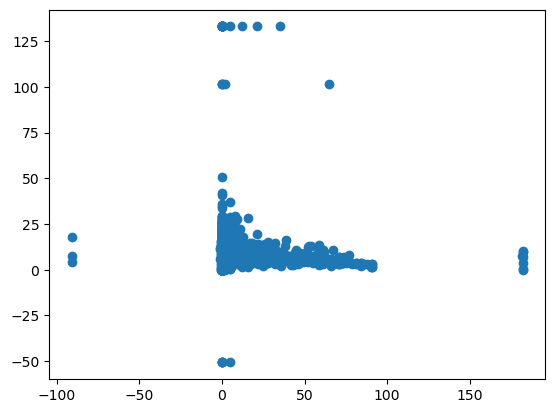

In [229]:
plt.scatter(df['ALTV'],df['MLTV'])

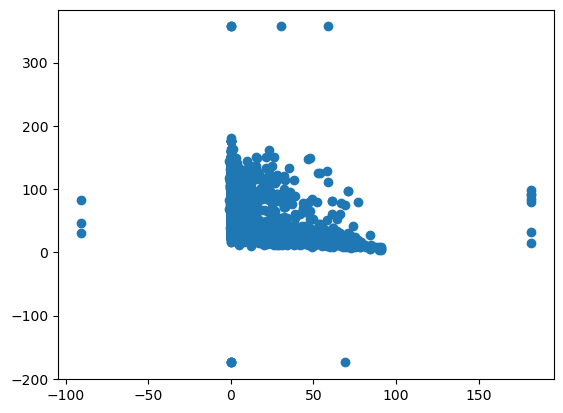

In [230]:
plt.scatter(df['ALTV'],df['Width'])

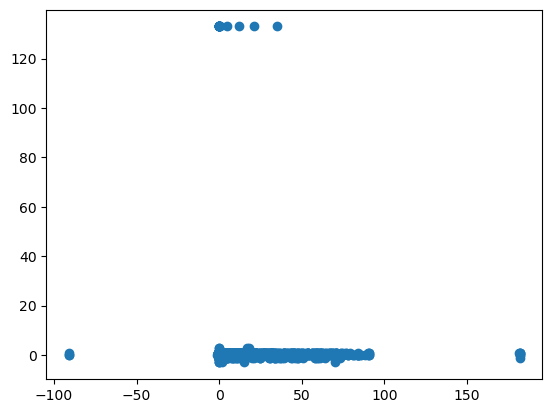

In [231]:
plt.scatter(df['ALTV'],df['Tendency'])

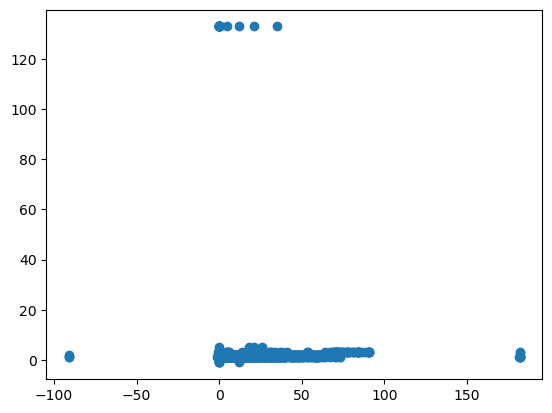

In [232]:
plt.scatter(df['ALTV'],df['NSP'])

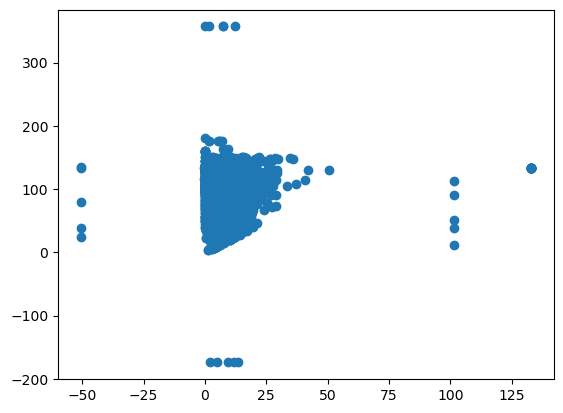

In [233]:
plt.scatter(df['MLTV'],df['Width'])

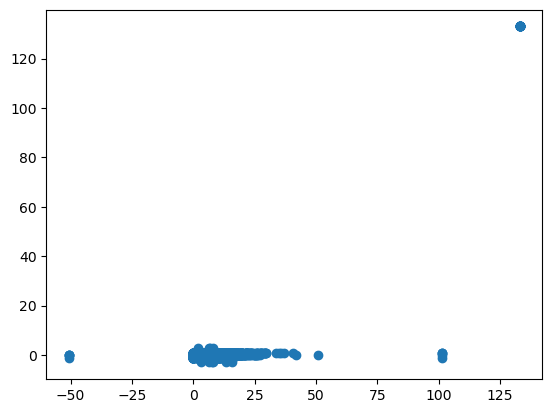

In [234]:
plt.scatter(df['MLTV'],df['Tendency'])

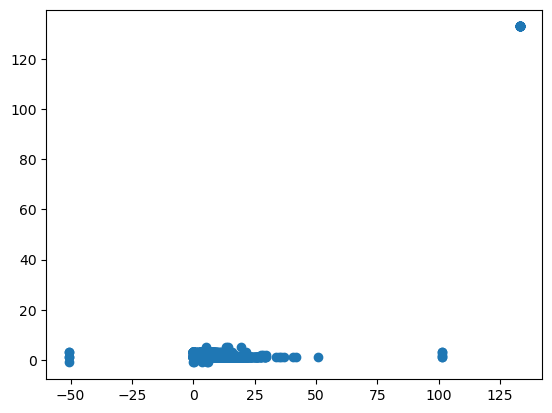

In [235]:
plt.scatter(df['MLTV'],df['NSP'])

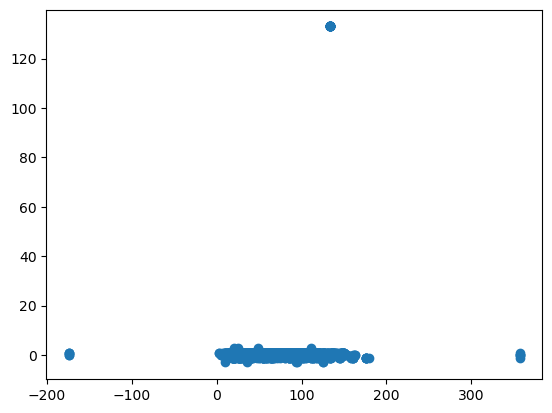

In [236]:
plt.scatter(df['Width'],df['Tendency'])

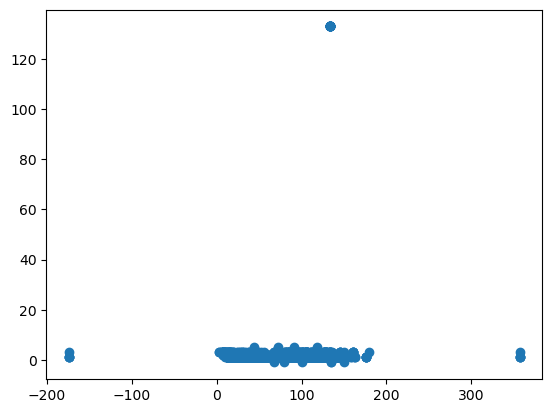

In [237]:
plt.scatter(df['Width'],df['NSP'])

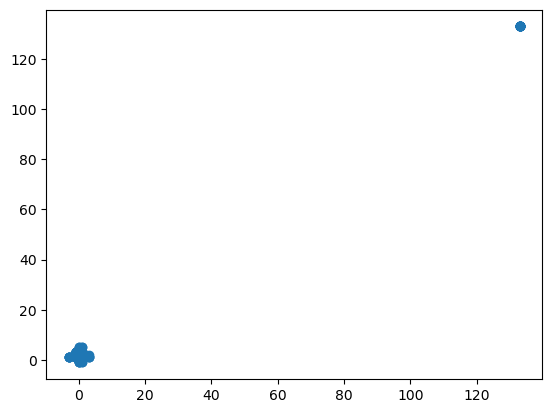

In [238]:
plt.scatter(df['Tendency'],df['NSP'])

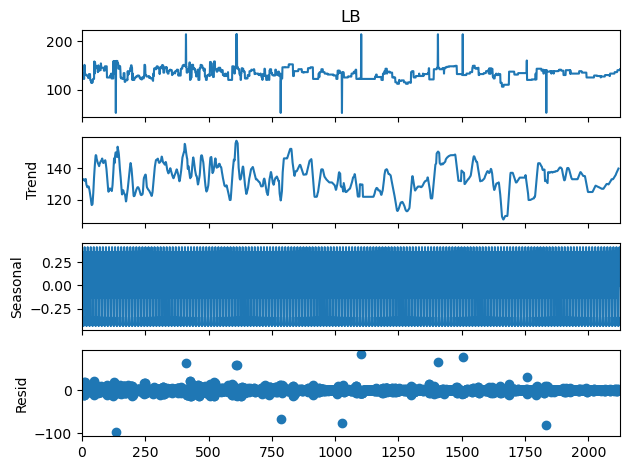

In [248]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(df['LB'], model='additive', period=12)

# Plot decomposition results
result.plot()
plt.show()

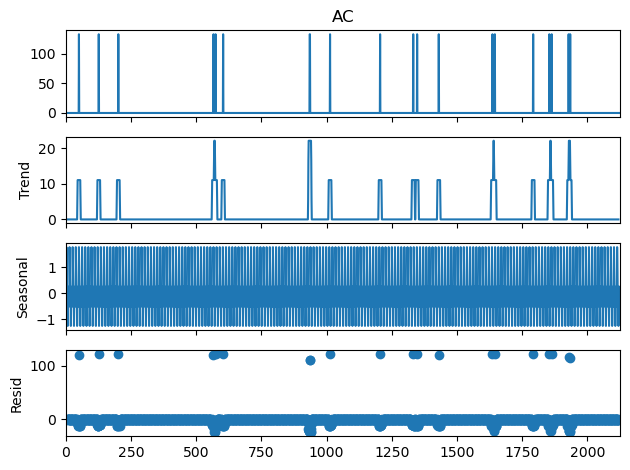

In [249]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(df['AC'], model='additive', period=12)

# Plot decomposition results
result.plot()
plt.show()

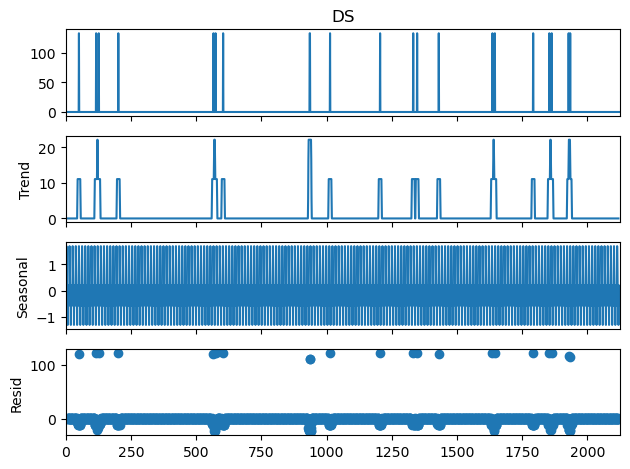

In [262]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(df['DS'], model='additive', period=12)

# Plot decomposition results
result.plot()
plt.show()

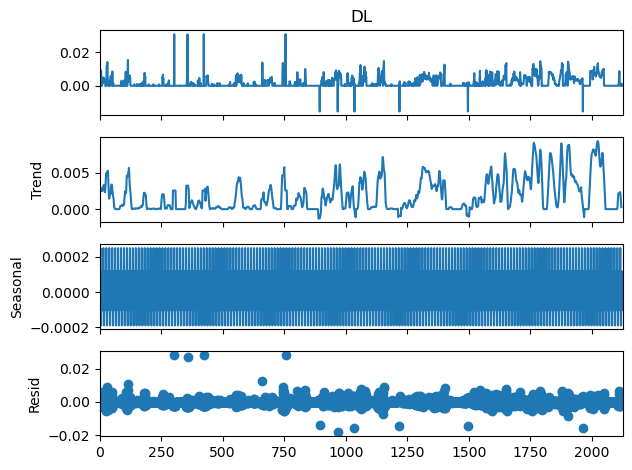

In [263]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(df['DL'], model='additive', period=12)

# Plot decomposition results
result.plot()
plt.show()

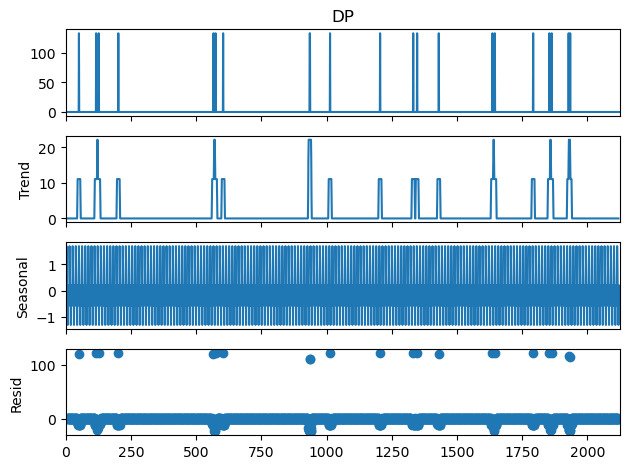

In [264]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(df['DP'], model='additive', period=12)

# Plot decomposition results
result.plot()
plt.show()

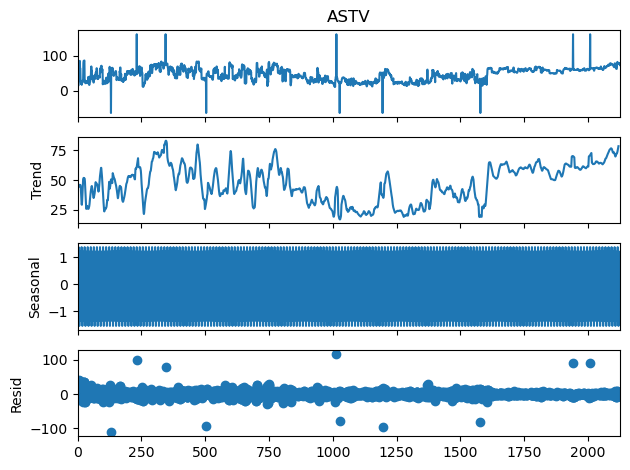

In [265]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(df['ASTV'], model='additive', period=12)

# Plot decomposition results
result.plot()
plt.show()

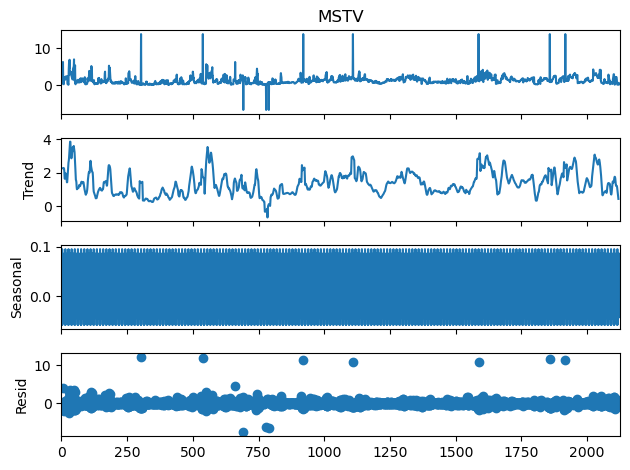

In [266]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(df['MSTV'], model='additive', period=12)

# Plot decomposition results
result.plot()
plt.show()

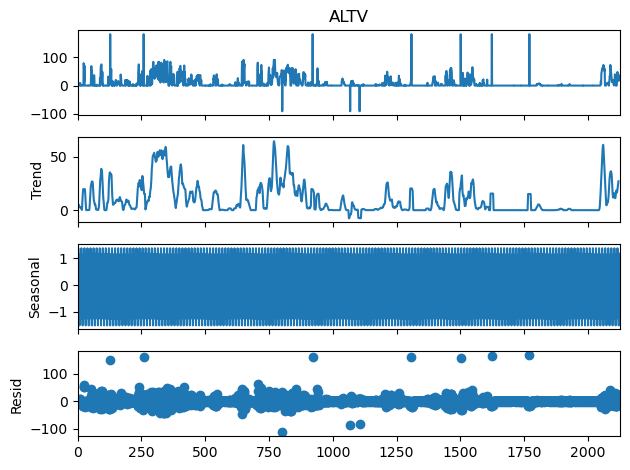

In [267]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(df['ALTV'], model='additive', period=12)

# Plot decomposition results
result.plot()
plt.show()

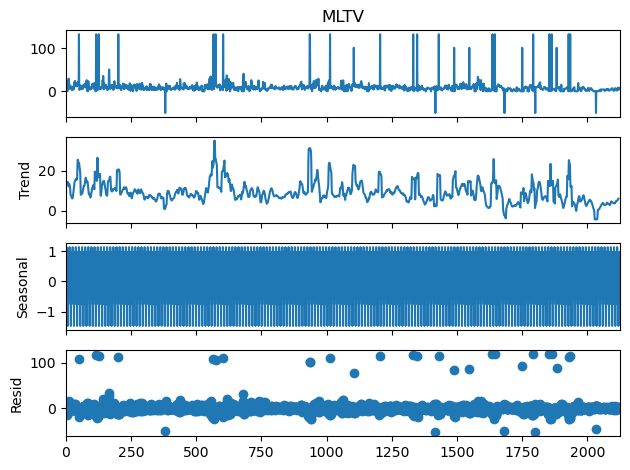

In [268]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(df['MLTV'], model='additive', period=12)

# Plot decomposition results
result.plot()
plt.show()

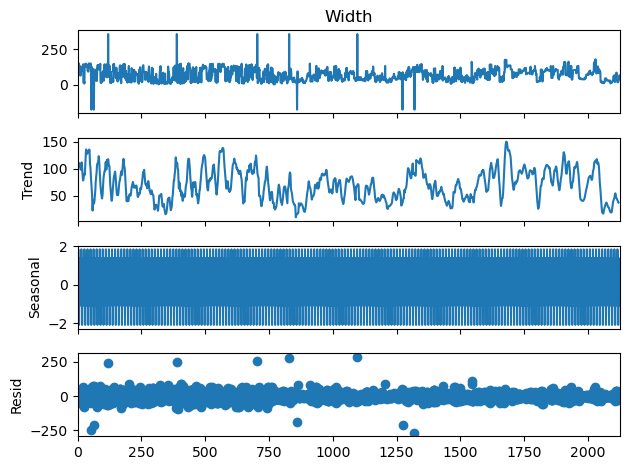

In [269]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(df['Width'], model='additive', period=12)

# Plot decomposition results
result.plot()
plt.show()

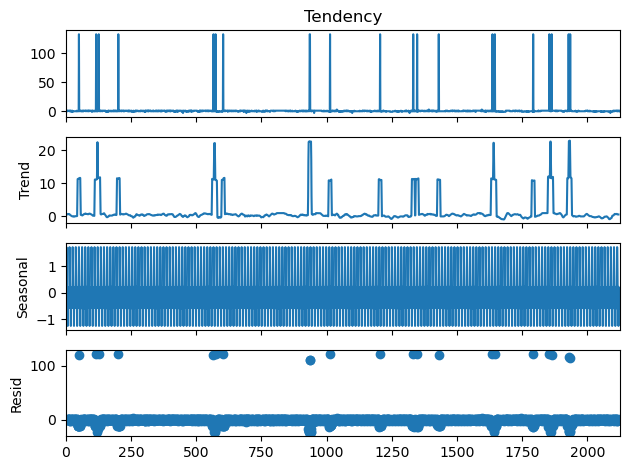

In [270]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(df['Tendency'], model='additive', period=12)

# Plot decomposition results
result.plot()
plt.show()

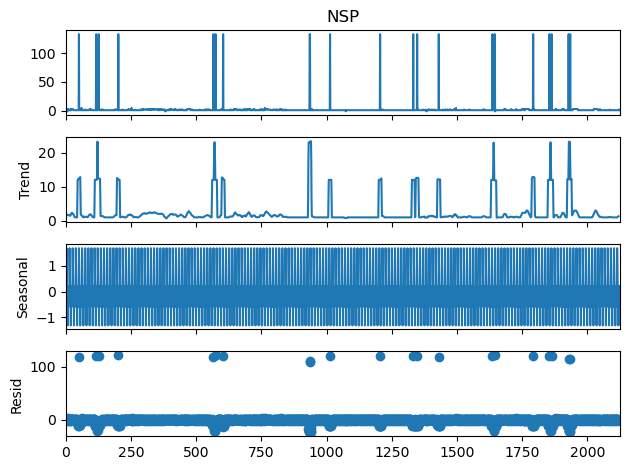

In [271]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(df['NSP'], model='additive', period=12)

# Plot decomposition results
result.plot()
plt.show()

# 	Conclusion:

In [ ]:
#All the columns have right skewness except ASTV.
#IQR of  DS DP are 0,which means Q1 & Q3 are equal but they do have outliers like other columns.
#None of the columns follow any kind of trend.
These conclusions will help the medical fraternity to provide some high accuracy treatment for the patients based on the analysis.